In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals
from explore.src.data.stats_dfs import StatsData

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(bucket_name="fbref_db", blob_name="defense.csv")

[03/09/24 17:17:59] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=912897;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=340355;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=902126;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=801516;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [5]:
df.head()

rk               player nation position           squad            comp  \
0   1  Patrick van Aanholt    NED       DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG    MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG    MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA       DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN       DF       Marseille         Ligue 1   

    age    born  90s_played  tackles  tackles_won  def_third_tackles  \
0  26.0  1990.0        24.3     47.0         32.0               29.0   
1  21.0  1995.0         1.5      4.0          4.0                3.0   
2  21.0  1995.0         5.7     13.0          8.0                4.0   
3  30.0  1986.0        11.7     20.0         17.0               10.0   
4  27.0  1989.0         5.5      7.0          3.0                5.0   

   mid_third_tackles  att_third_tackles  dribblers_tackled  \
0               15.0                3.0               16.0   
1                1.0                0.0                4.0   
2                4.0                5.0                1.0   
3                9.0                1.0                6.0   
4                2.0                0.0                4.0   

   dribblers_challenged  tackle_pct  challenges_lost  blocks  shots_blocked  \
0                  34.0        47.1             18.0    24.0            5.0   
1                   6.0        66.7              2.0     3.0            0.0   
2                   7.0        14.3              6.0     3.0            1.0   
3                  11.0        54.5              5.0    22.0            2.0   
4                   7.0        57.1              3.0     5.0            5.0   

   passes_blocked  interceptions  tackles_interceptions  clearances  errors  \
0            19.0           47.0                   94.0        64.0     2.0   
1             3.0            1.0                    5.0         0.0     0.0   
2             2.0            2.0                   15.0         0.0     0.0   
3            20.0            8.0                   28.0        29.0     0.0   
4             0.0            4.0                   11.0        20.0     0.0   

      season  
0  2017-2018  
1  2017-2018  
2  2017-2018  
3  2017-2018  
4  2017-2018

In [6]:
# rename position col
df = df.rename(columns={"position": "pos"})

In [7]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB',

In [8]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born  90s_played  tackles  tackles_won  def_third_tackles  \
0  26.0  1990.0        24.3     47.0         32.0               29.0   
1  21.0  1995.0         1.5      4.0          4.0                3.0   
2  21.0  1995.0         5.7     13.0          8.0                4.0   
3  30.0  1986.0        11.7     20.0         17.0               10.0   
4  27.0  1989.0         5.5      7.0          3.0                5.0   

   mid_third_tackles  att_third_tackles  dribblers_tackled  \
0               15.0                3.0               16.0   
1                1.0                0.0                4.0   
2                4.0                5.0                1.0   
3                9.0                1.0                6.0   
4                2.0                0.0                4.0   

   dribblers_challenged  tackle_pct  challenges_lost  blocks  shots_blocked  \
0                  34.0        47.1             18.0    24.0            5.0   
1                   6.0        66.7              2.0     3.0            0.0   
2                   7.0        14.3              6.0     3.0            1.0   
3                  11.0        54.5              5.0    22.0            2.0   
4                   7.0        57.1              3.0     5.0            5.0   

   passes_blocked  interceptions  tackles_interceptions  clearances  errors  \
0            19.0           47.0                   94.0        64.0     2.0   
1             3.0            1.0                    5.0         0.0     0.0   
2             2.0            2.0                   15.0         0.0     0.0   
3            20.0            8.0                   28.0        29.0     0.0   
4             0.0            4.0                   11.0        20.0     0.0   

      season general_pos age_range      country continent  
0  2017-2018    Defender     25-29  Netherlands    Europe  
1  2017-2018  Midfielder     20-24      England    Europe  
2  2017-2018  Midfielder     20-24      England    Europe  
3  2017-2018    Defender     30-34        Italy    Europe  
4  2017-2018    Defender     25-29      Tunisia    Africa

In [67]:
stat_plots = StatisticPlots(df)

In [9]:
cols = df.columns[9:-5]
cols

Index(['tackles', 'tackles_won', 'def_third_tackles', 'mid_third_tackles',
       'att_third_tackles', 'dribblers_tackled', 'dribblers_challenged',
       'tackle_pct', 'challenges_lost', 'blocks', 'shots_blocked',
       'passes_blocked', 'interceptions', 'tackles_interceptions',
       'clearances', 'errors'],
      dtype='object')

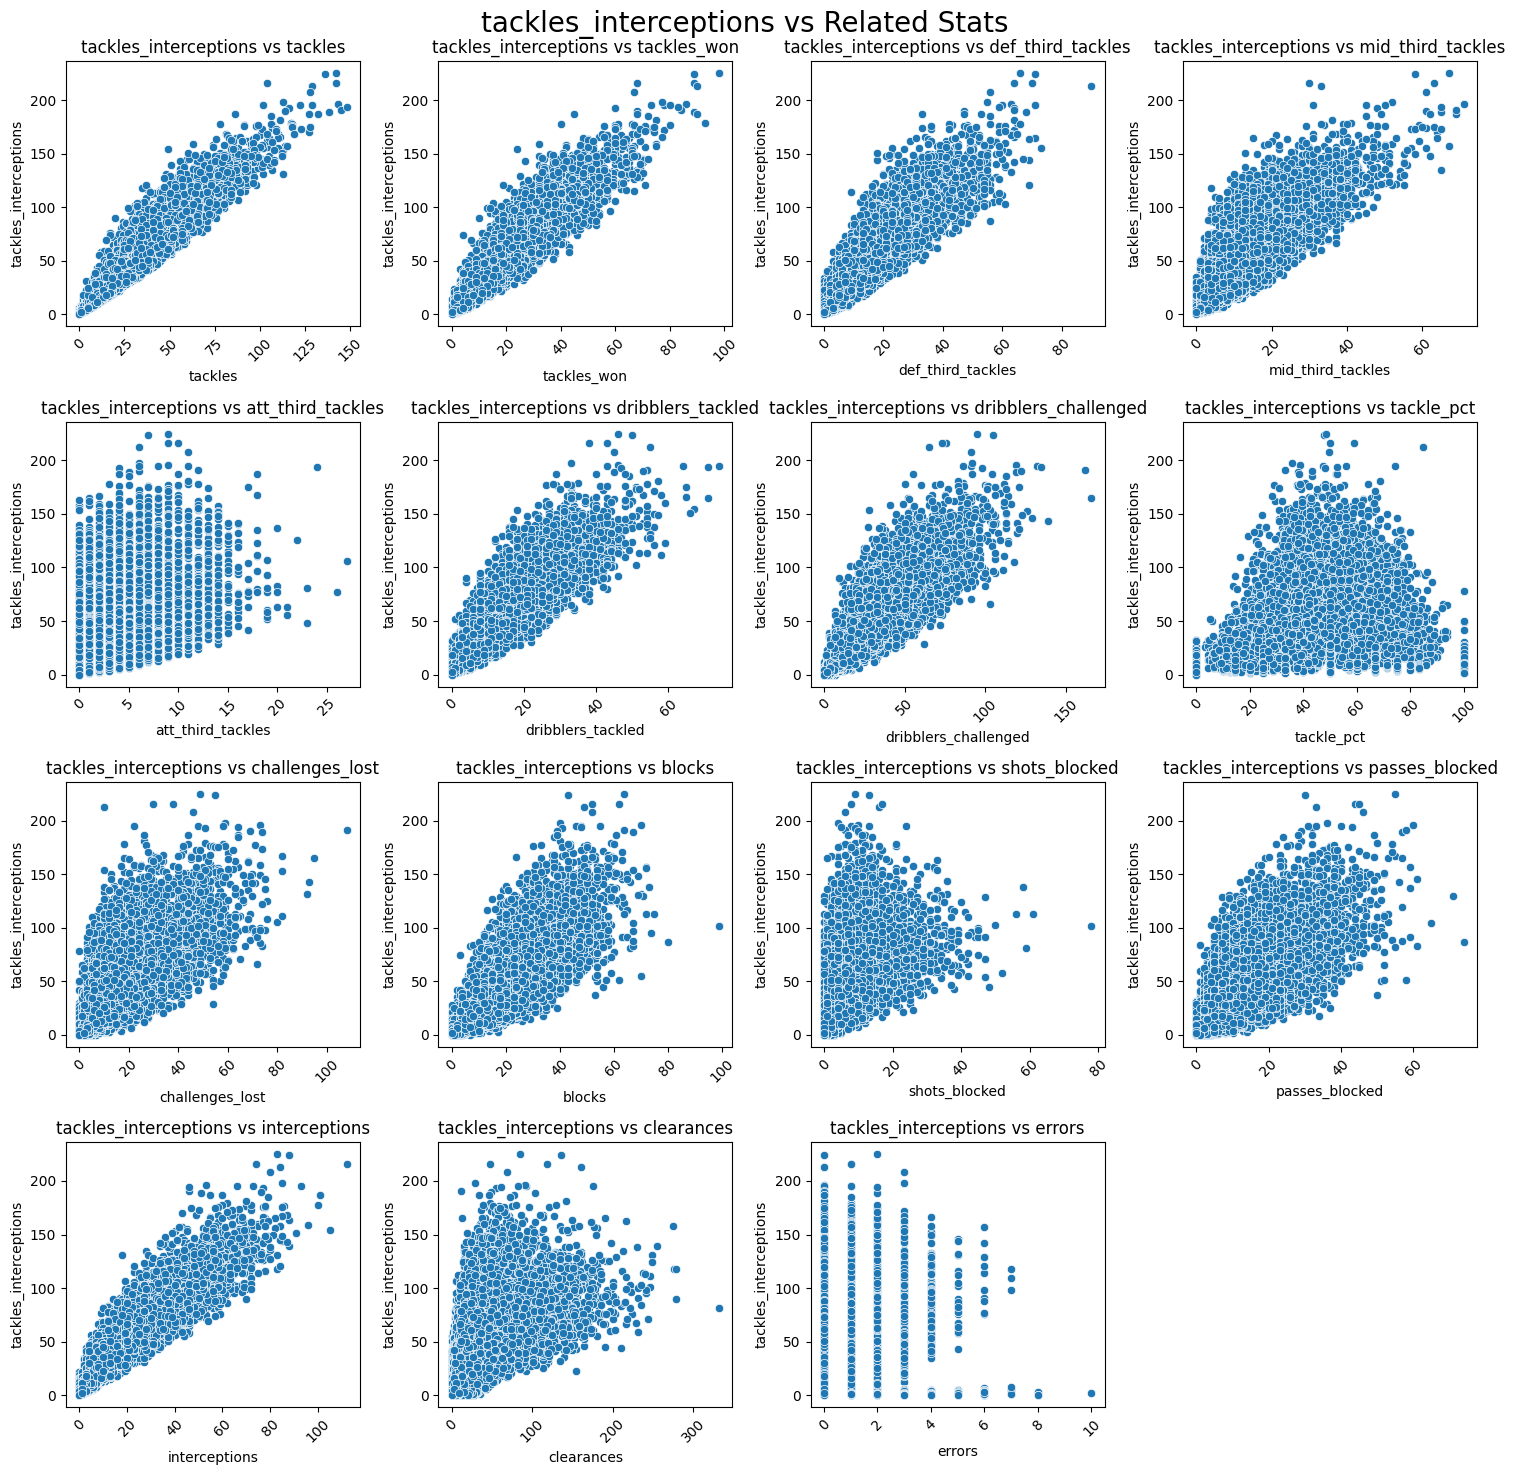

In [69]:
stat_plots.relationships(y='tackles_interceptions', X=cols)

which player made over 200 tackles and interceptions whilst also having a success rate over 80%? 

In [70]:
df.loc[(df['tackles_interceptions'] > 200) & (df['tackle_pct'] > 80)][['player', 'tackles_interceptions', 'tackle_pct']]

player  tackles_interceptions  tackle_pct
5255  Aaron Wan-Bissaka                  213.0        84.6

which player had a tackle success of 100 percent and made the most tackles?

In [71]:
df.loc[(df['tackles_interceptions'] > 50) & (df['tackle_pct'] == 100)][['player', 'tackles_interceptions', 'tackle_pct']]

player  tackles_interceptions  tackle_pct
5193  Virgil van Dijk                   78.0       100.0

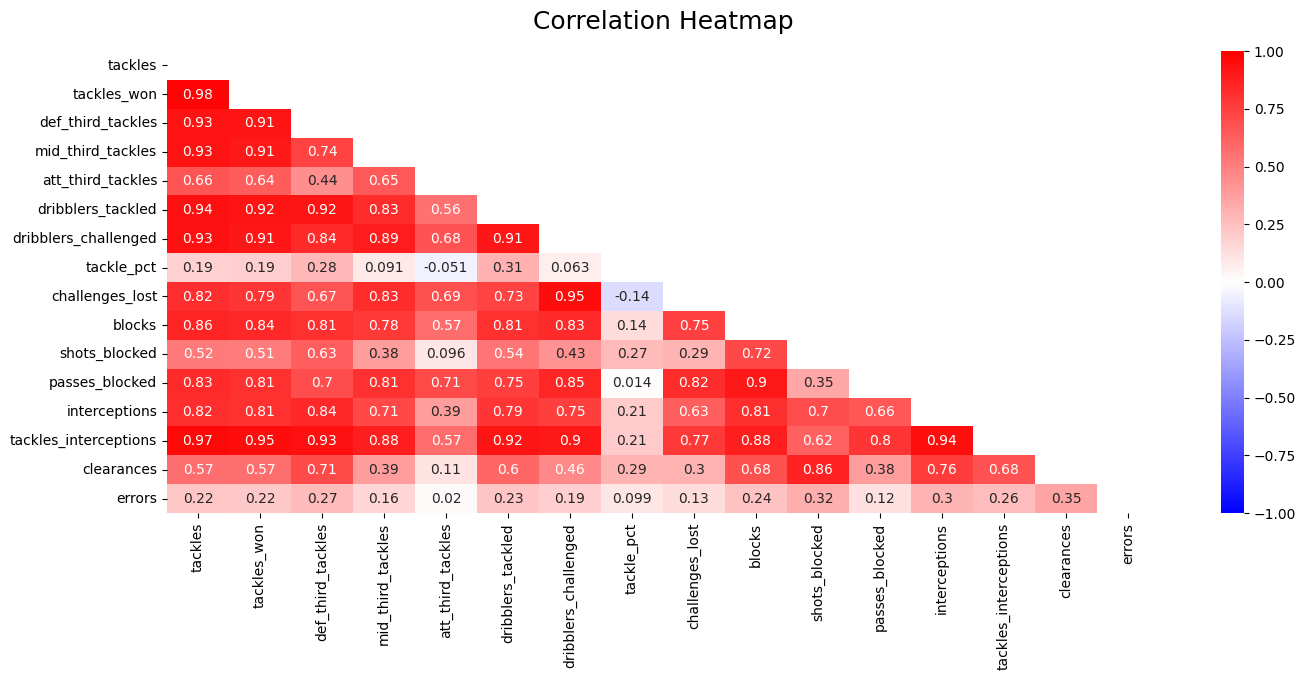

In [72]:
stat_plots.correlation_matrix(cols)

- summarise tackle stats by league, team, players, age_range, season, and country

In [10]:
defense_stats = StatsData(df)

By League

In [15]:
# remove 2023-2024 season
dff = df.loc[df['season'] != '2023-2024']

In [16]:
defense_visuals = StatsVisuals(dff)

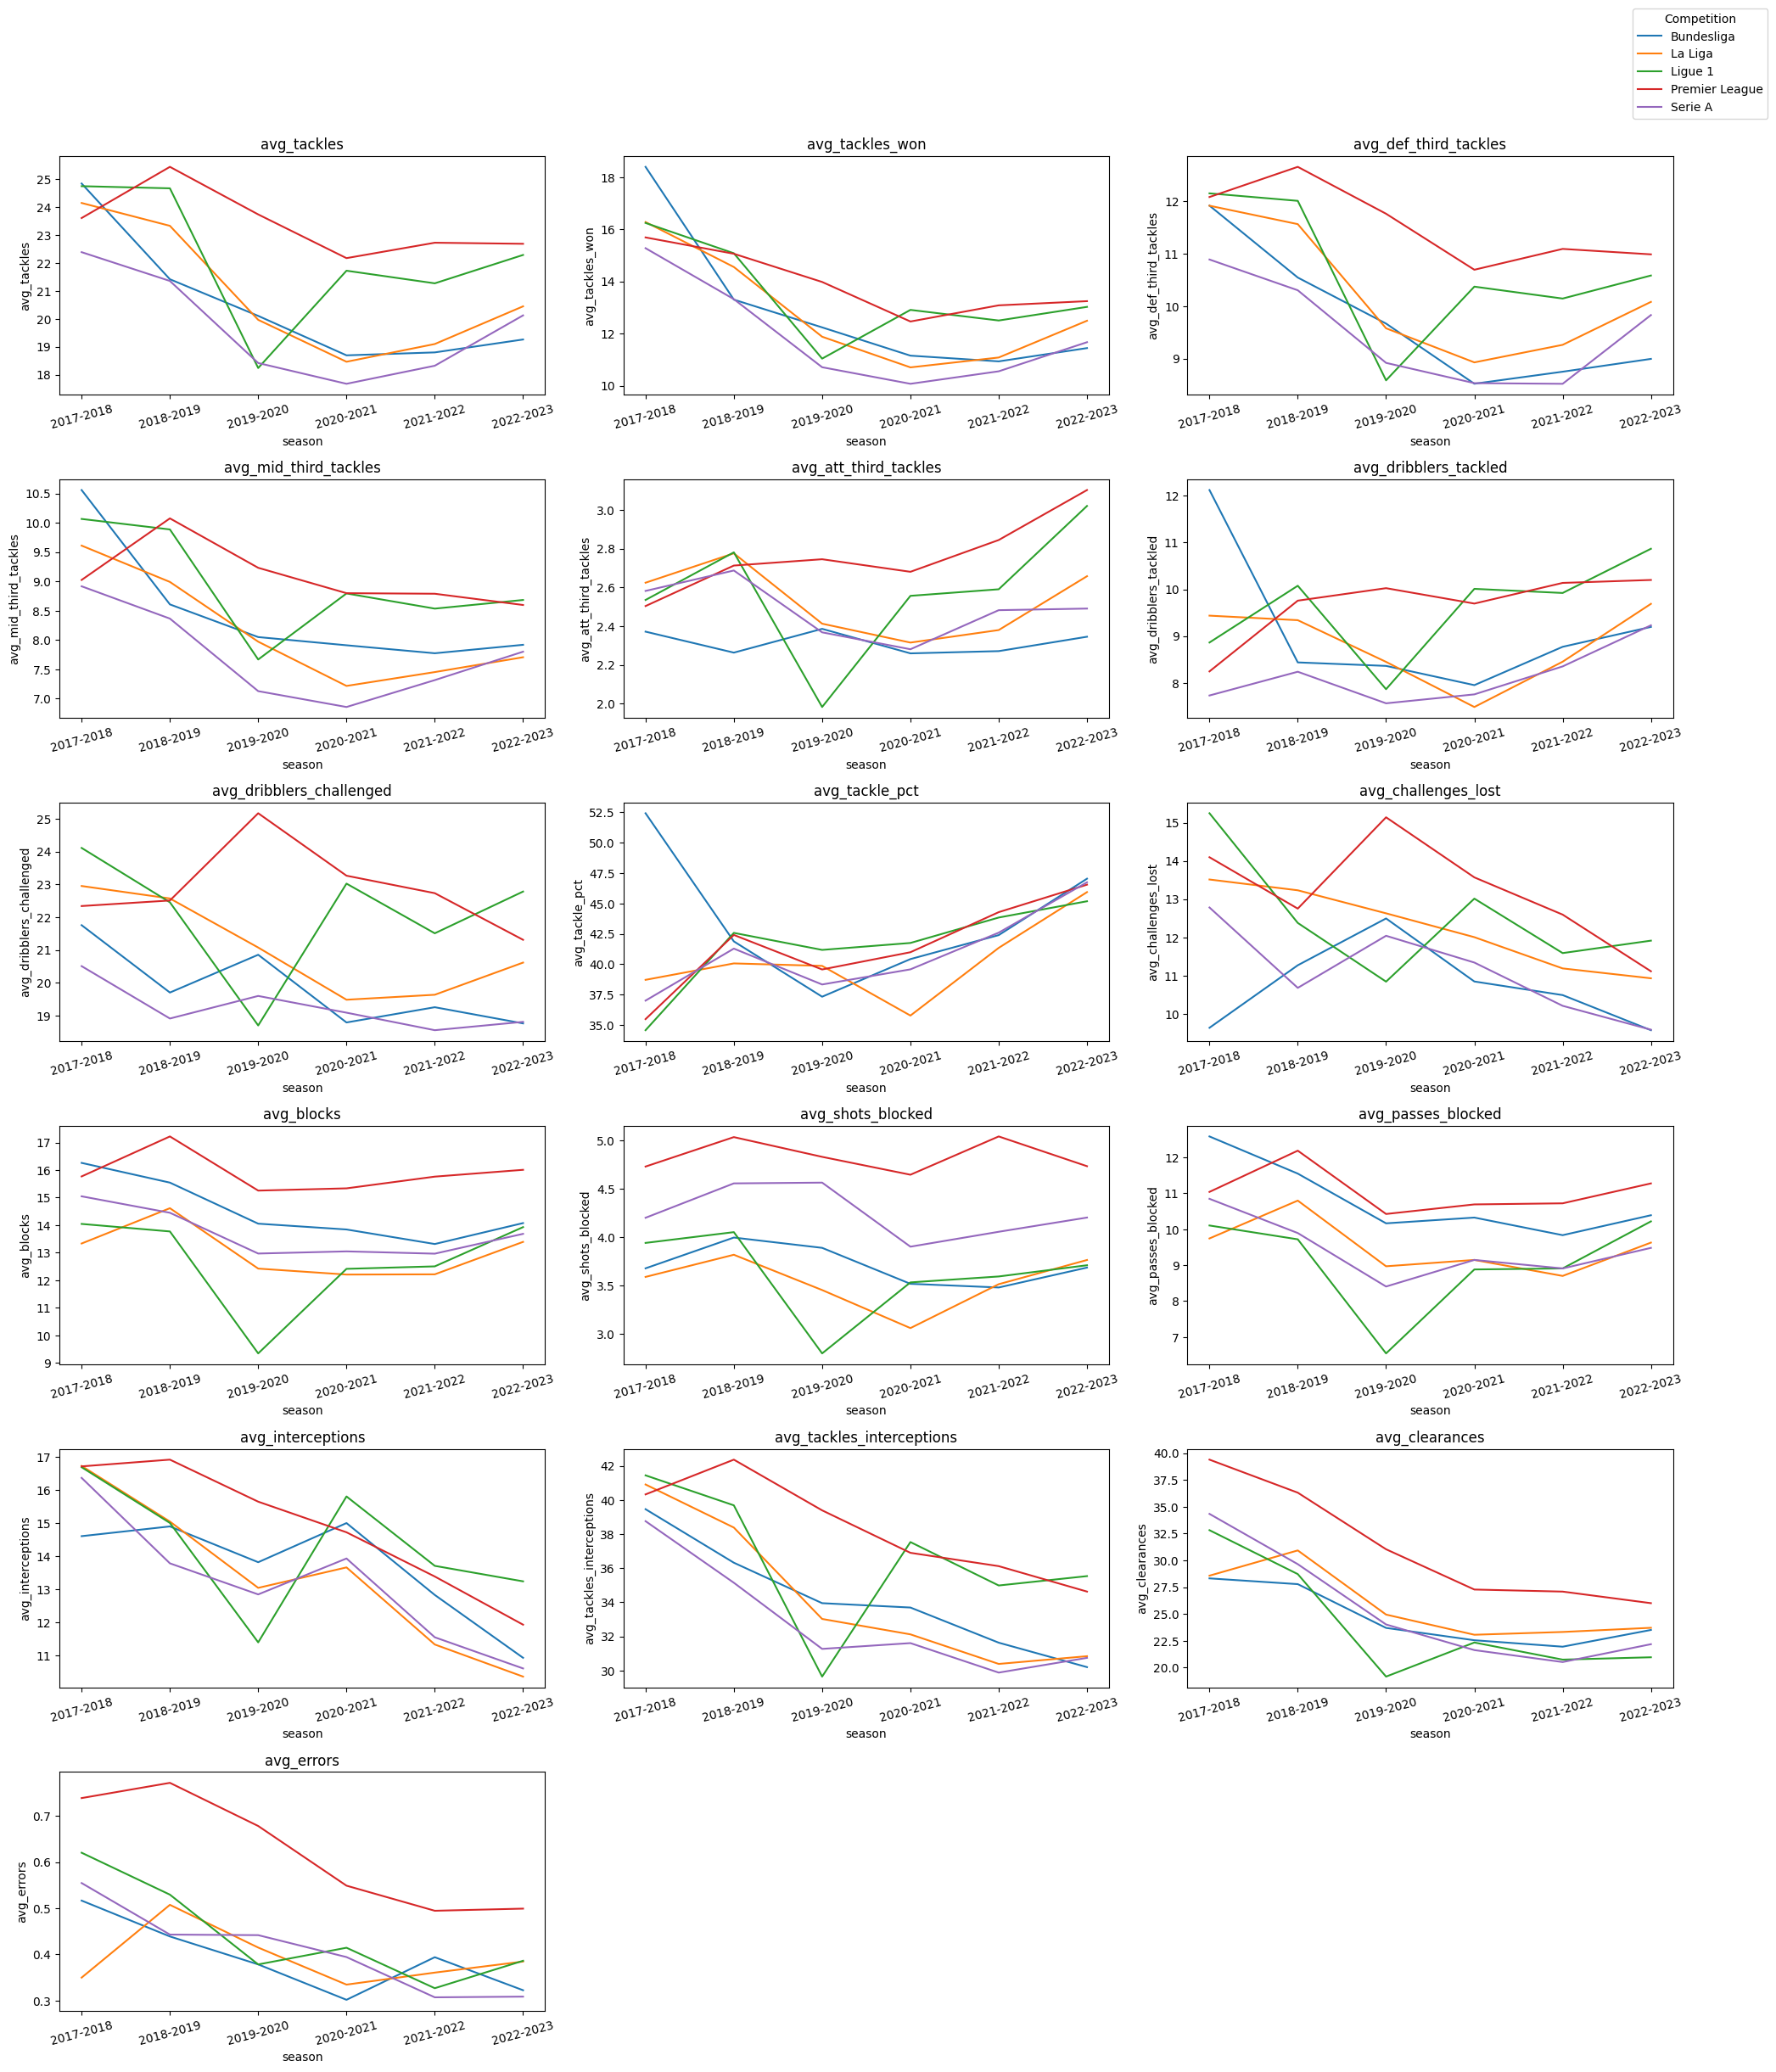

In [17]:
defense_visuals.avgs_time_series('comp', cols)

In [19]:
defense_visuals.avgs_time_series('general_pos', cols)

In [20]:
avg_position = defense_stats.avgs_df(groupby='general_pos', columns=cols)

In [23]:
avg_position.loc[avg_position['general_pos'] != 'Unknown'].head()

season general_pos  avg_tackles  avg_tackles_won  avg_def_third_tackles  \
0  2017-2018    Defender    30.602578        21.068670              19.119227   
1  2017-2018     Forward    13.359636         9.239757               4.388467   
2  2017-2018  Goalkeeper     0.394089         0.236453               0.389163   
3  2017-2018  Midfielder    30.136465        20.271812              12.204698   
5  2018-2019    Defender    29.971892        18.792432              18.609730   

   avg_mid_third_tackles  avg_att_third_tackles  avg_dribblers_tackled  \
0               9.525242               1.958110              14.132116   
1               6.016692               2.954476               3.658574   
2               0.004926               0.000000               0.320197   
3              14.550336               3.381432              10.221477   
5               9.280000               2.082162              13.840000   

   avg_dribblers_challenged  avg_tackle_pct  avg_challenges_lost  avg_blocks  \
0                 25.587540       54.627048            11.455424   19.342642   
1                 14.376328       24.853401            10.717754   10.097117   
2                  1.059113       29.595050             0.738916    0.172414   
3                 29.706935       34.524702            19.485459   16.967562   
5                 24.806486       56.271991            10.966486   19.855135   

   avg_shots_blocked  avg_passes_blocked  avg_interceptions  \
0           8.238453           11.104189          25.650215   
1           0.915023            9.182094           5.910470   
2           0.000000            0.172414           0.665025   
3           2.847875           14.119687          17.640940   
5           8.585946           11.269189          24.301622   

   avg_tackles_interceptions  avg_clearances  avg_errors  
0                  56.279270       68.861439    0.745435  
1                  19.270106        9.279211    0.110774  
2                   1.059113        7.817734    1.793103  
3                  47.777405       17.994407    0.399329  
5                  54.273514       63.789189    0.749189

In [24]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born  90s_played  tackles  tackles_won  def_third_tackles  \
0  26.0  1990.0        24.3     47.0         32.0               29.0   
1  21.0  1995.0         1.5      4.0          4.0                3.0   
2  21.0  1995.0         5.7     13.0          8.0                4.0   
3  30.0  1986.0        11.7     20.0         17.0               10.0   
4  27.0  1989.0         5.5      7.0          3.0                5.0   

   mid_third_tackles  att_third_tackles  dribblers_tackled  \
0               15.0                3.0               16.0   
1                1.0                0.0                4.0   
2                4.0                5.0                1.0   
3                9.0                1.0                6.0   
4                2.0                0.0                4.0   

   dribblers_challenged  tackle_pct  challenges_lost  blocks  shots_blocked  \
0                  34.0        47.1             18.0    24.0            5.0   
1                   6.0        66.7              2.0     3.0            0.0   
2                   7.0        14.3              6.0     3.0            1.0   
3                  11.0        54.5              5.0    22.0            2.0   
4                   7.0        57.1              3.0     5.0            5.0   

   passes_blocked  interceptions  tackles_interceptions  clearances  errors  \
0            19.0           47.0                   94.0        64.0     2.0   
1             3.0            1.0                    5.0         0.0     0.0   
2             2.0            2.0                   15.0         0.0     0.0   
3            20.0            8.0                   28.0        29.0     0.0   
4             0.0            4.0                   11.0        20.0     0.0   

      season general_pos age_range      country continent  
0  2017-2018    Defender     25-29  Netherlands    Europe  
1  2017-2018  Midfielder     20-24      England    Europe  
2  2017-2018  Midfielder     20-24      England    Europe  
3  2017-2018    Defender     30-34        Italy    Europe  
4  2017-2018    Defender     25-29      Tunisia    Africa

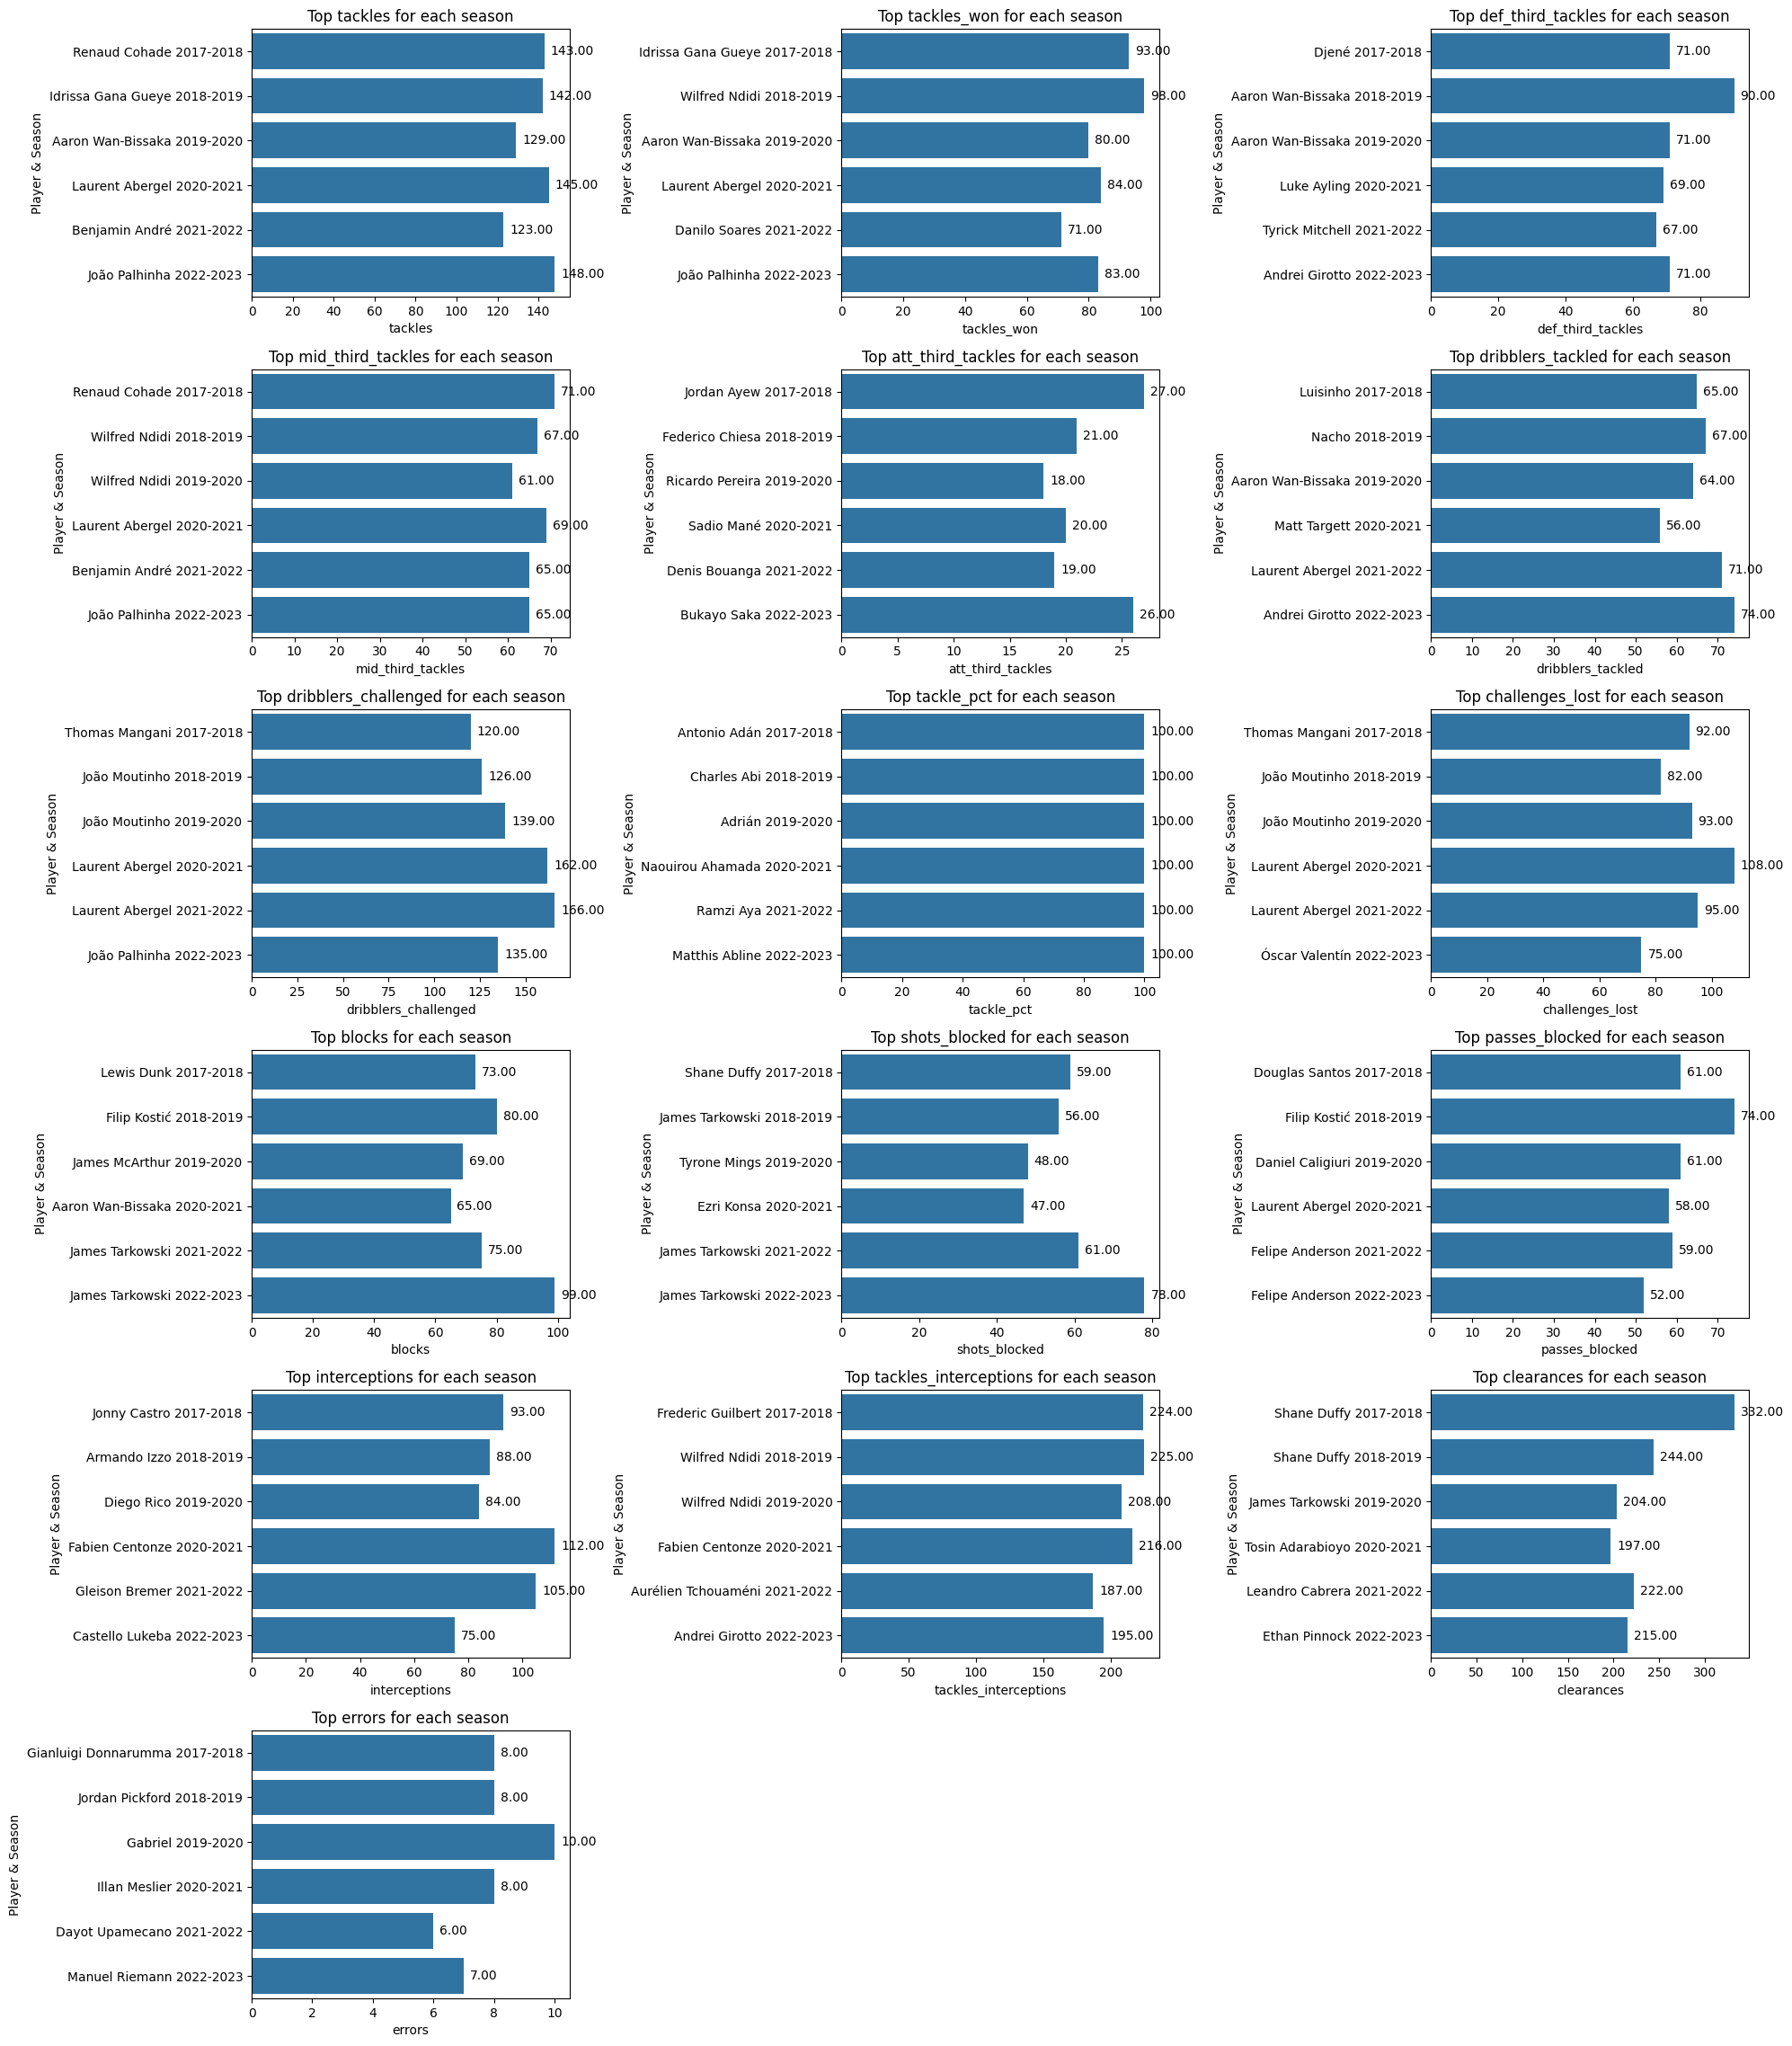

In [25]:
defense_visuals.top_per_season(cols)

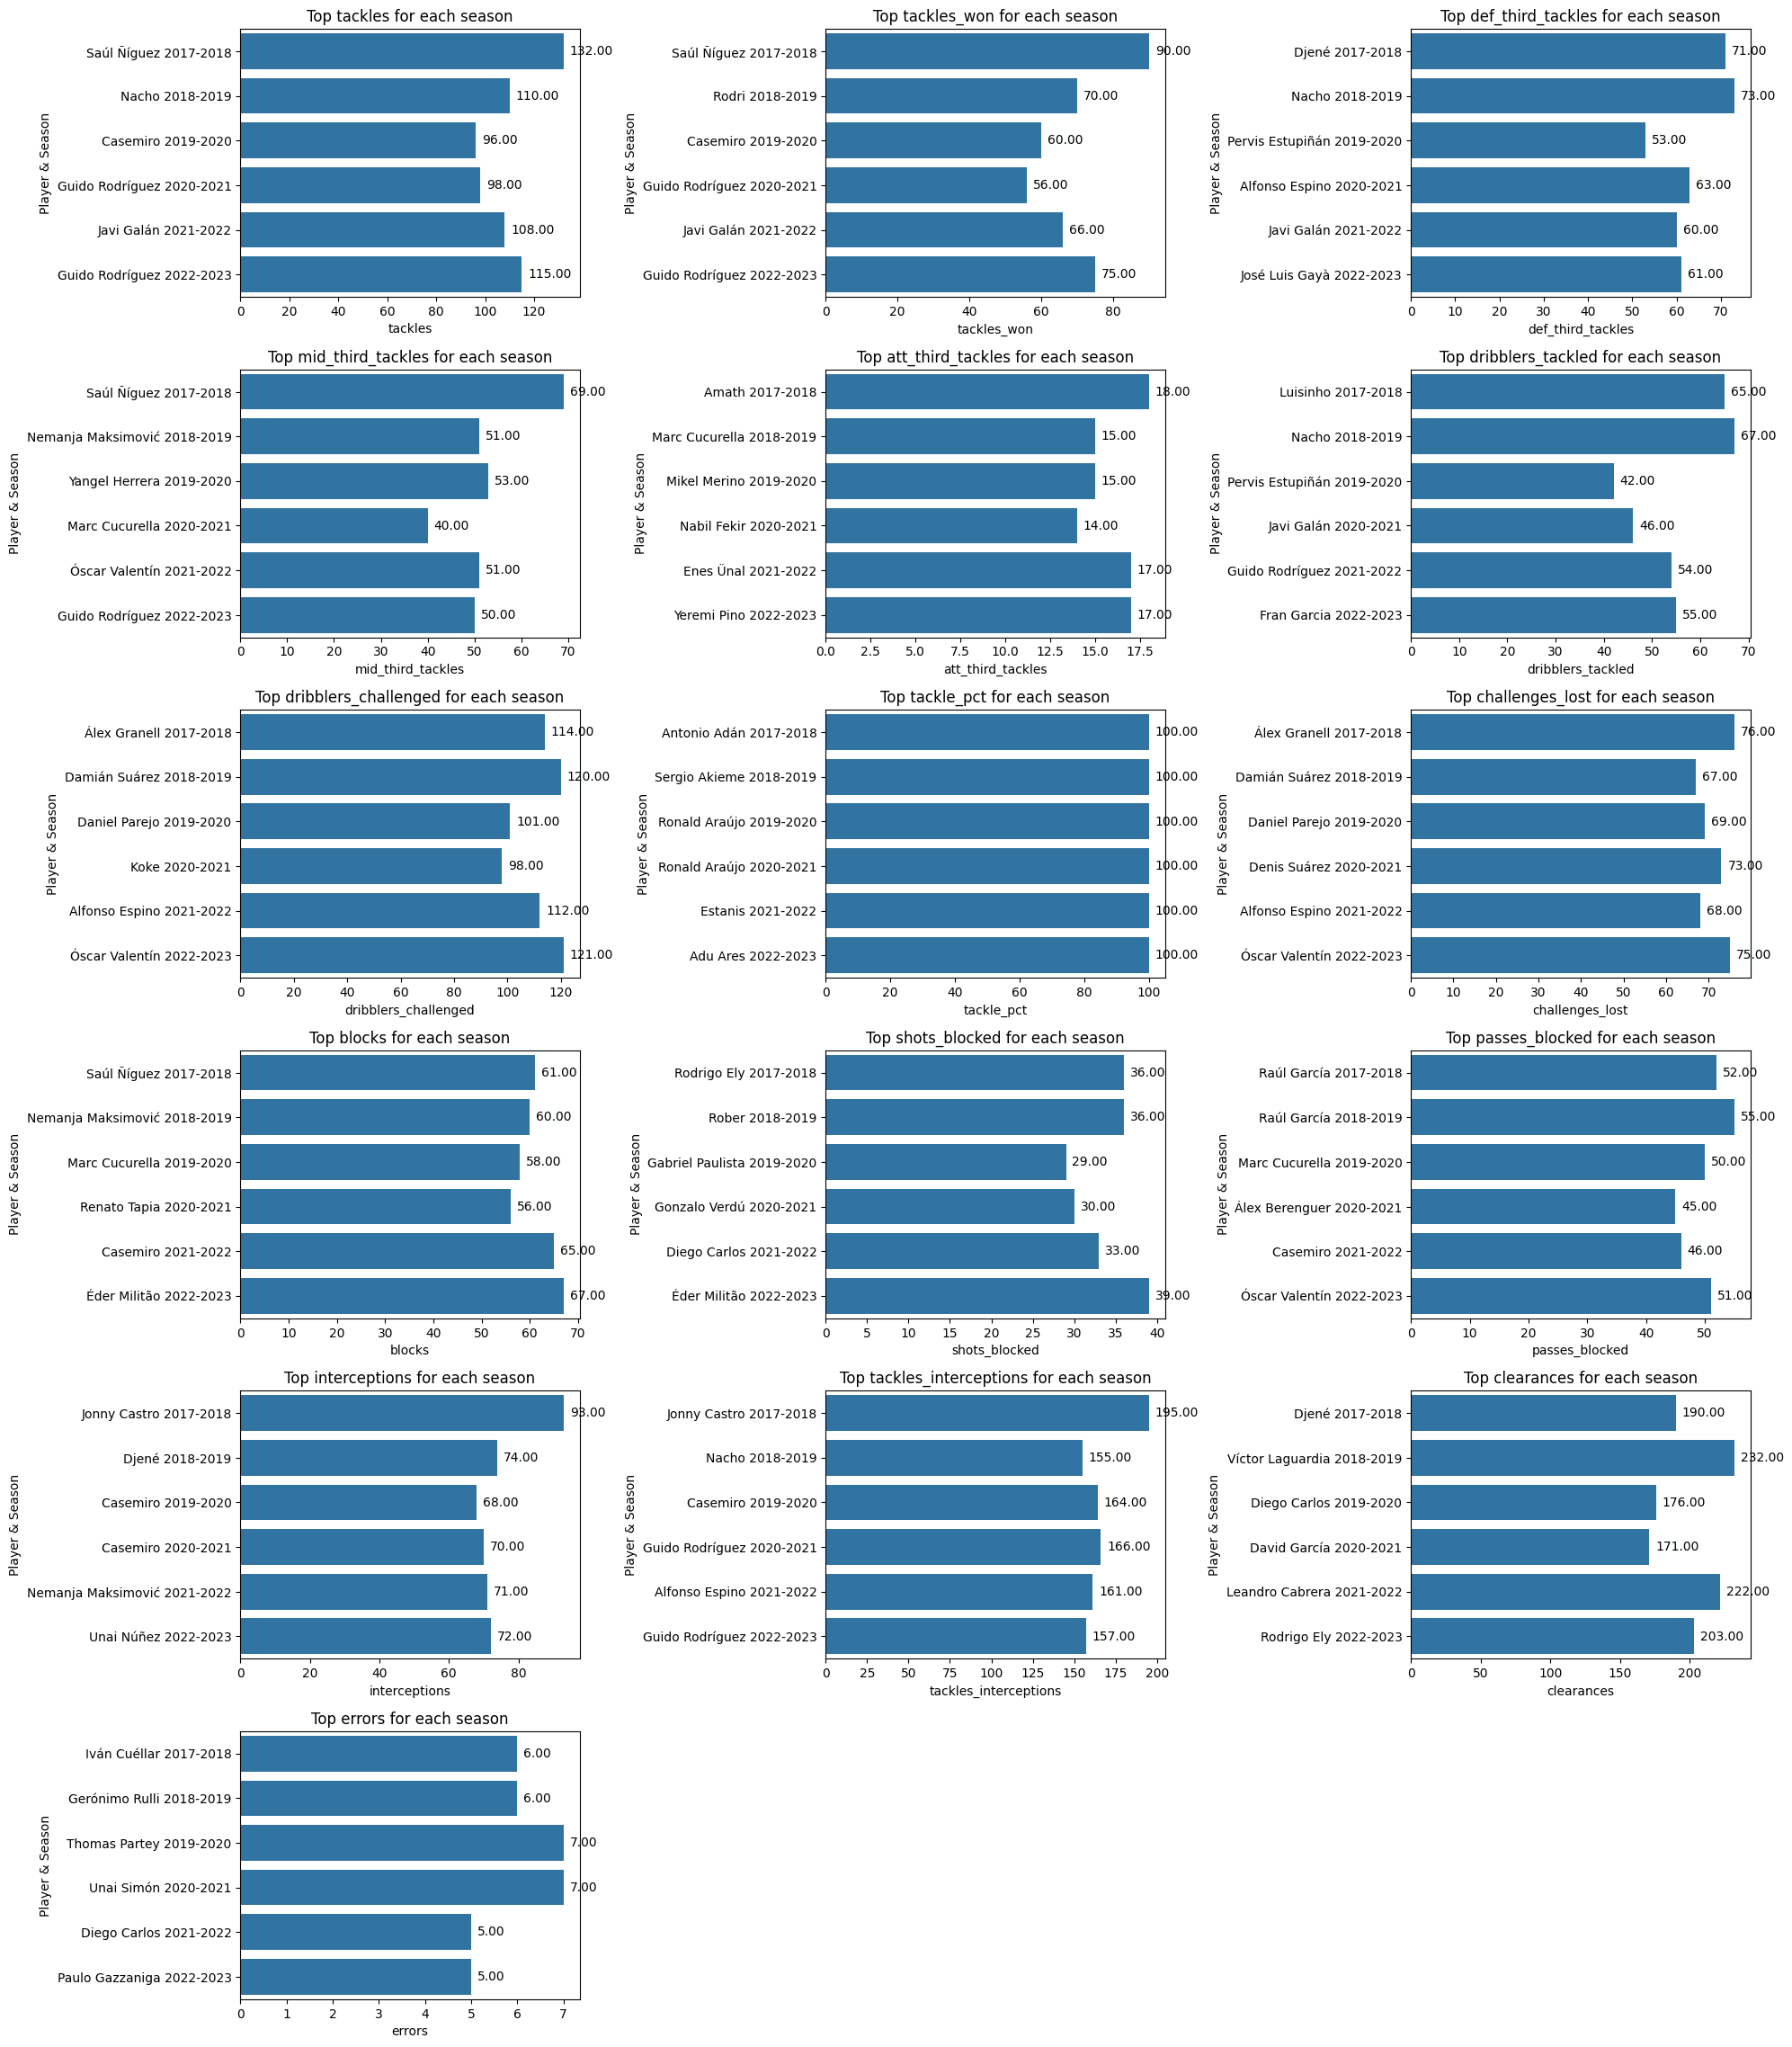

In [26]:
defense_visuals.top_per_season(cols, league='La Liga')

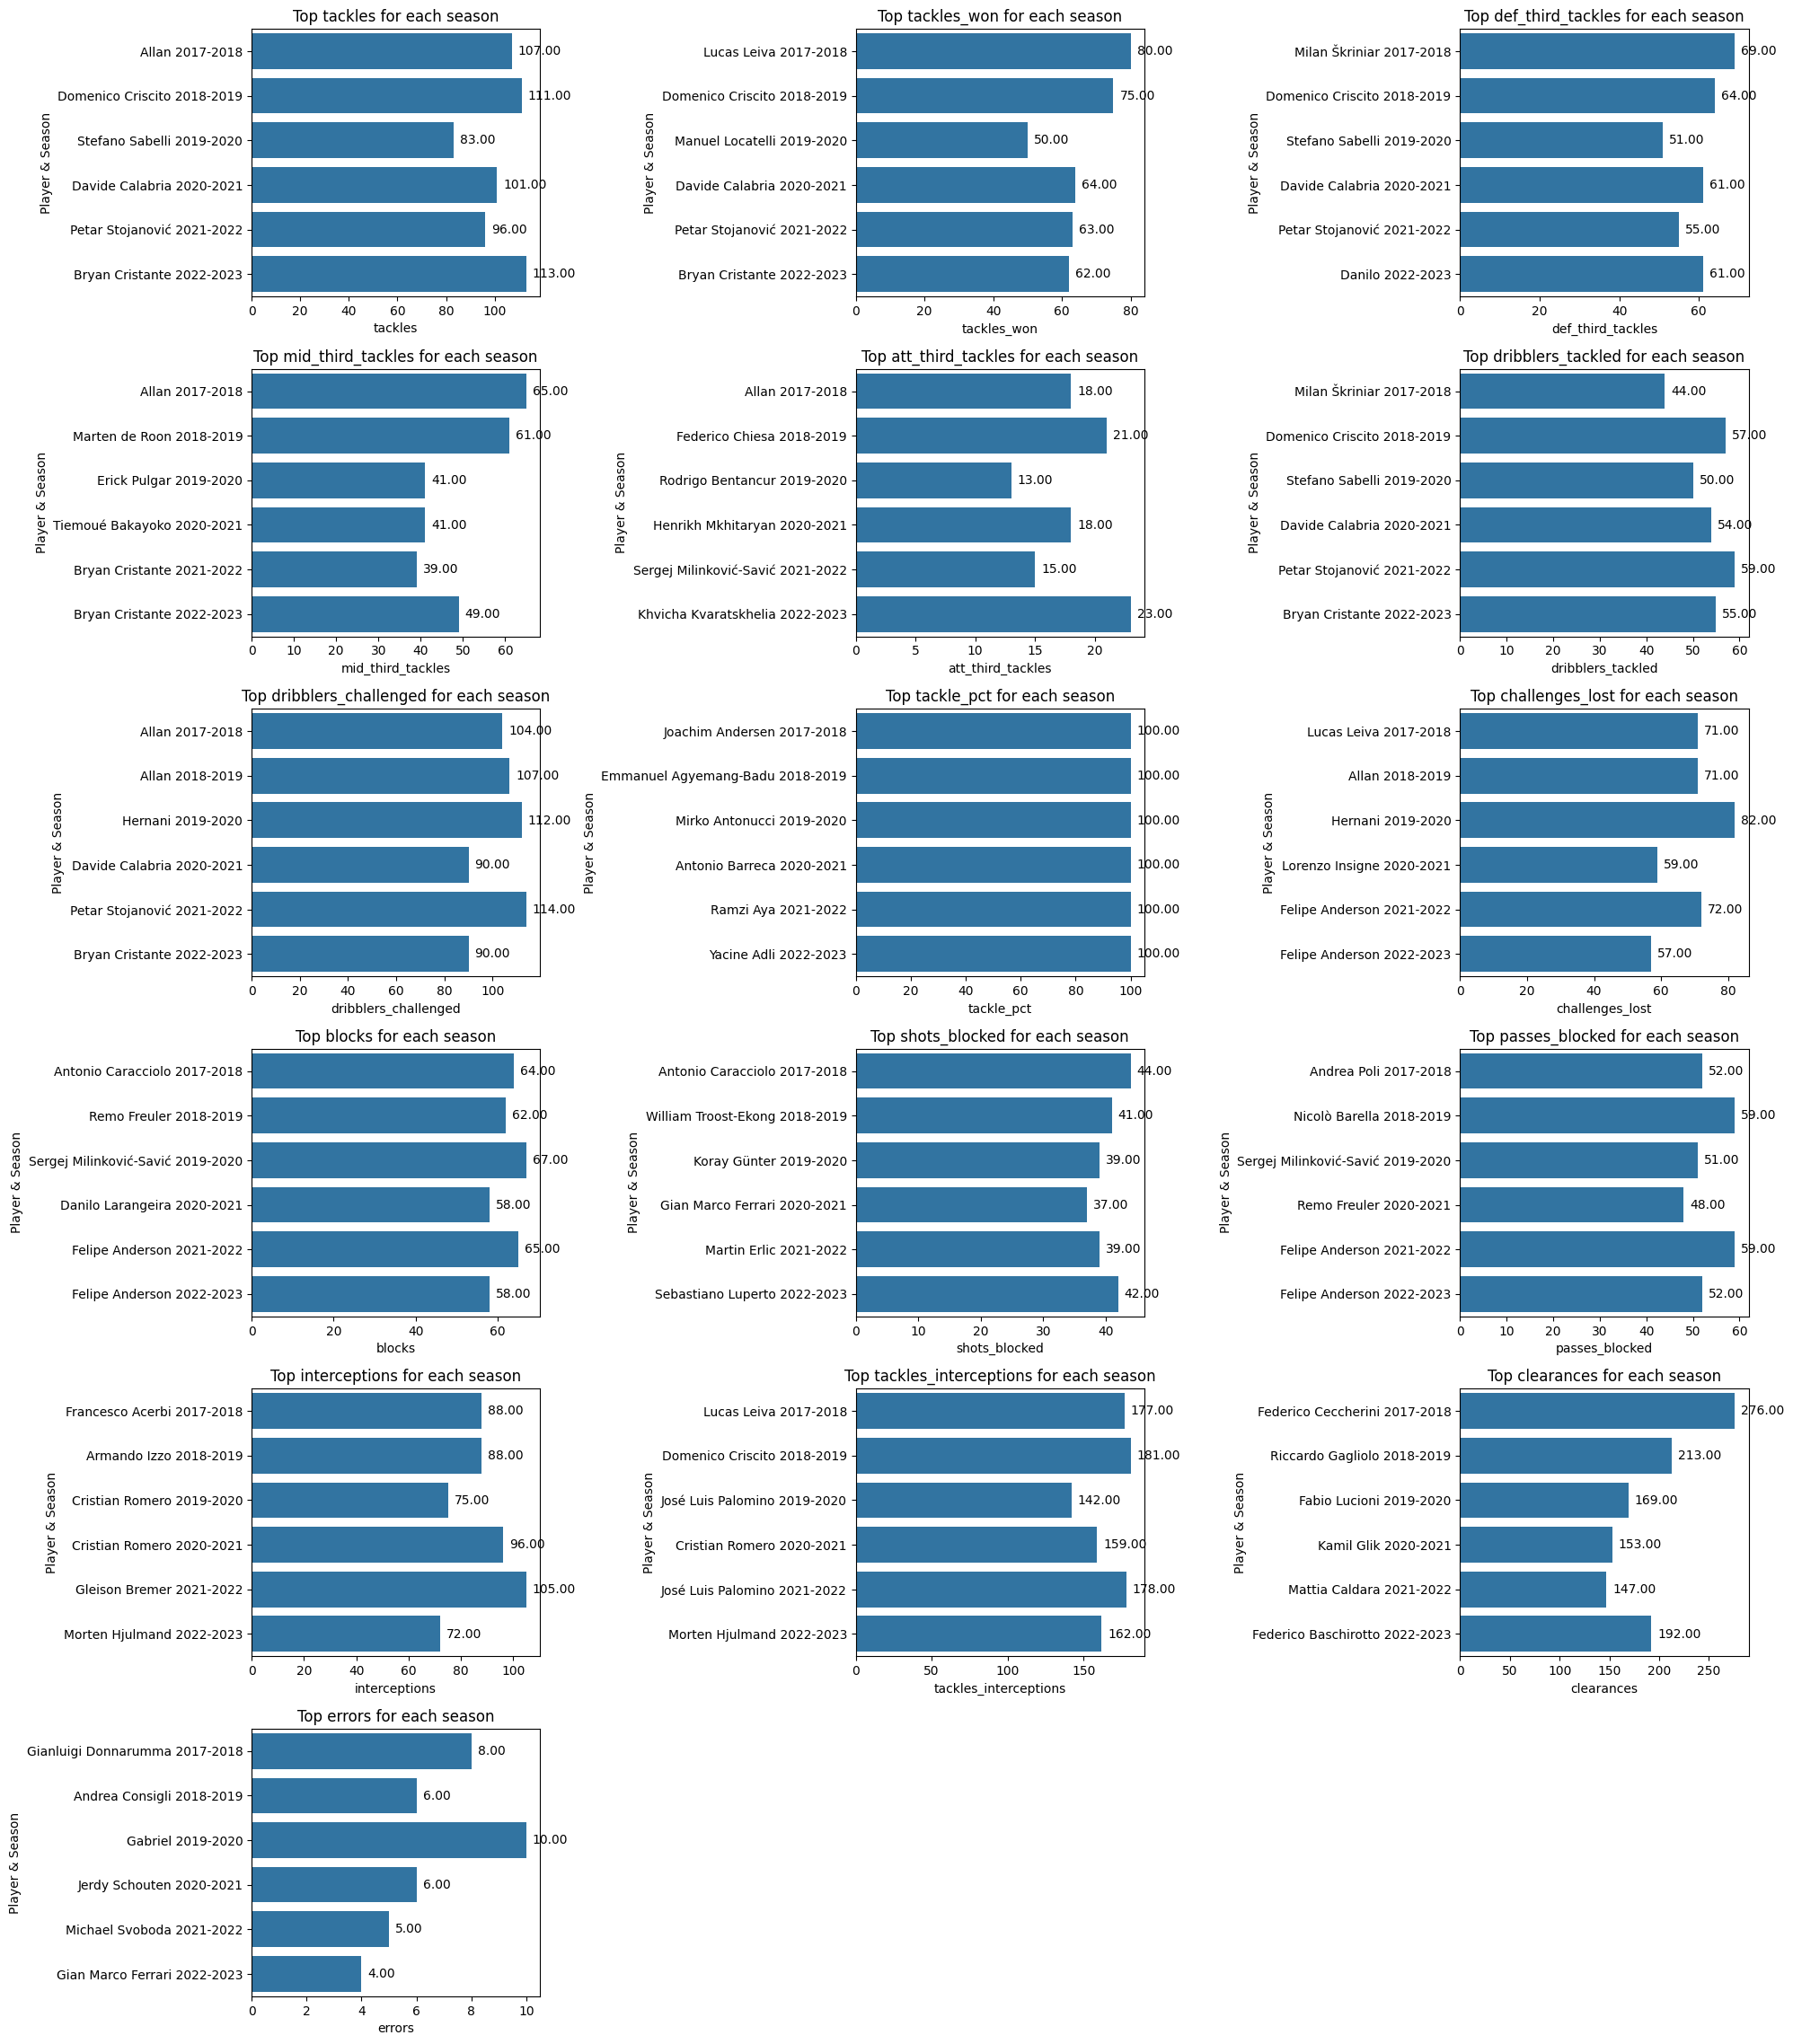

In [27]:
defense_visuals.top_per_season(cols, league='Serie A')

Which players made the fewest errors for players who played over 20 90s?

In [30]:
# does not contain 2023-2024 season
df_20_90s_played = dff.loc[dff['90s_played'] >= 20]

In [56]:
def top_10_per_position(df, col, position: str = "Defender", ascending: bool = False):
    dff = (
        df.loc[df["general_pos"] == position][["season", "player", col]]
        .sort_values(col, ascending=ascending)
        .reset_index(drop=True)
        .head(10)
    )
    
    dff.loc[:, 'player_season'] = dff['player'] + ' - ' + dff['season']
    return dff

In [57]:
top_10_per_position(df_20_90s_played, 'tackles')

season             player  tackles                  player_season
0  2017-2018  Frederic Guilbert    136.0  Frederic Guilbert - 2017-2018
1  2019-2020  Aaron Wan-Bissaka    129.0  Aaron Wan-Bissaka - 2019-2020
2  2018-2019  Aaron Wan-Bissaka    129.0  Aaron Wan-Bissaka - 2018-2019
3  2022-2023     Andrei Girotto    122.0     Andrei Girotto - 2022-2023
4  2019-2020    Ricardo Pereira    119.0    Ricardo Pereira - 2019-2020
5  2018-2019    Ricardo Pereira    118.0    Ricardo Pereira - 2018-2019
6  2022-2023       Jonas Hector    112.0       Jonas Hector - 2022-2023
7  2018-2019  Domenico Criscito    111.0  Domenico Criscito - 2018-2019
8  2017-2018           Luisinho    111.0           Luisinho - 2017-2018
9  2017-2018       Mario Gaspar    110.0       Mario Gaspar - 2017-2018

In [49]:
top_10_per_position(df_20_90s_played, 'challenges_lost', ascending=True)

season           player  challenges_lost
0  2018-2019  Virgil van Dijk              0.0
1  2020-2021   William Saliba              1.0
2  2018-2019       Wes Morgan              1.0
3  2021-2022   Kieran Tierney              1.0
4  2021-2022       Marc Guéhi              1.0
5  2022-2023   Adama Soumaoro              2.0
6  2017-2018      Karim Rekik              2.0
7  2017-2018      Ömer Toprak              3.0
8  2018-2019    Ferland Mendy              3.0
9  2020-2021   Jonathan Panzo              3.0

In [50]:
df.columns

Index(['rk', 'player', 'nation', 'pos', 'squad', 'comp', 'age', 'born',
       '90s_played', 'tackles', 'tackles_won', 'def_third_tackles',
       'mid_third_tackles', 'att_third_tackles', 'dribblers_tackled',
       'dribblers_challenged', 'tackle_pct', 'challenges_lost', 'blocks',
       'shots_blocked', 'passes_blocked', 'interceptions',
       'tackles_interceptions', 'clearances', 'errors', 'season',
       'general_pos', 'age_range', 'country', 'continent'],
      dtype='object')

In [52]:
top_10_per_position(df_20_90s_played, 'interceptions')

season              player  interceptions
0  2020-2021     Fabien Centonze          112.0
1  2021-2022      Gleison Bremer          105.0
2  2021-2022  José Luis Palomino          100.0
3  2020-2021     Cristian Romero           96.0
4  2017-2018        Jonny Castro           93.0
5  2020-2021     Alexander Djiku           91.0
6  2017-2018    Francesco Acerbi           88.0
7  2017-2018   Frederic Guilbert           88.0
8  2018-2019        Armando Izzo           88.0
9  2018-2019       Wesley Lautoa           87.0

In [63]:
def plot_top_10_per_position(
    df: pd.DataFrame,
    cols: list[str],
    position: str = "Defender",
    ascending: bool = False,
):
    fig, axes = plt.subplots(8, 2, figsize=(20, 20))

    for col, ax in zip(cols, axes.flatten()):
        data = top_10_per_position(df, col, position=position, ascending=ascending)
        sns.barplot(data=data, y="player_season", x=col, ax=ax)
        ax.set_title(f"{col}")
        # annotate
        for i in range(data.shape[0]):
            ax.text(
                data[col].iloc[i],
                i,
                round(data[col].iloc[i], 2),
                ha="left",
                va="center",
            )

    plt.tight_layout()

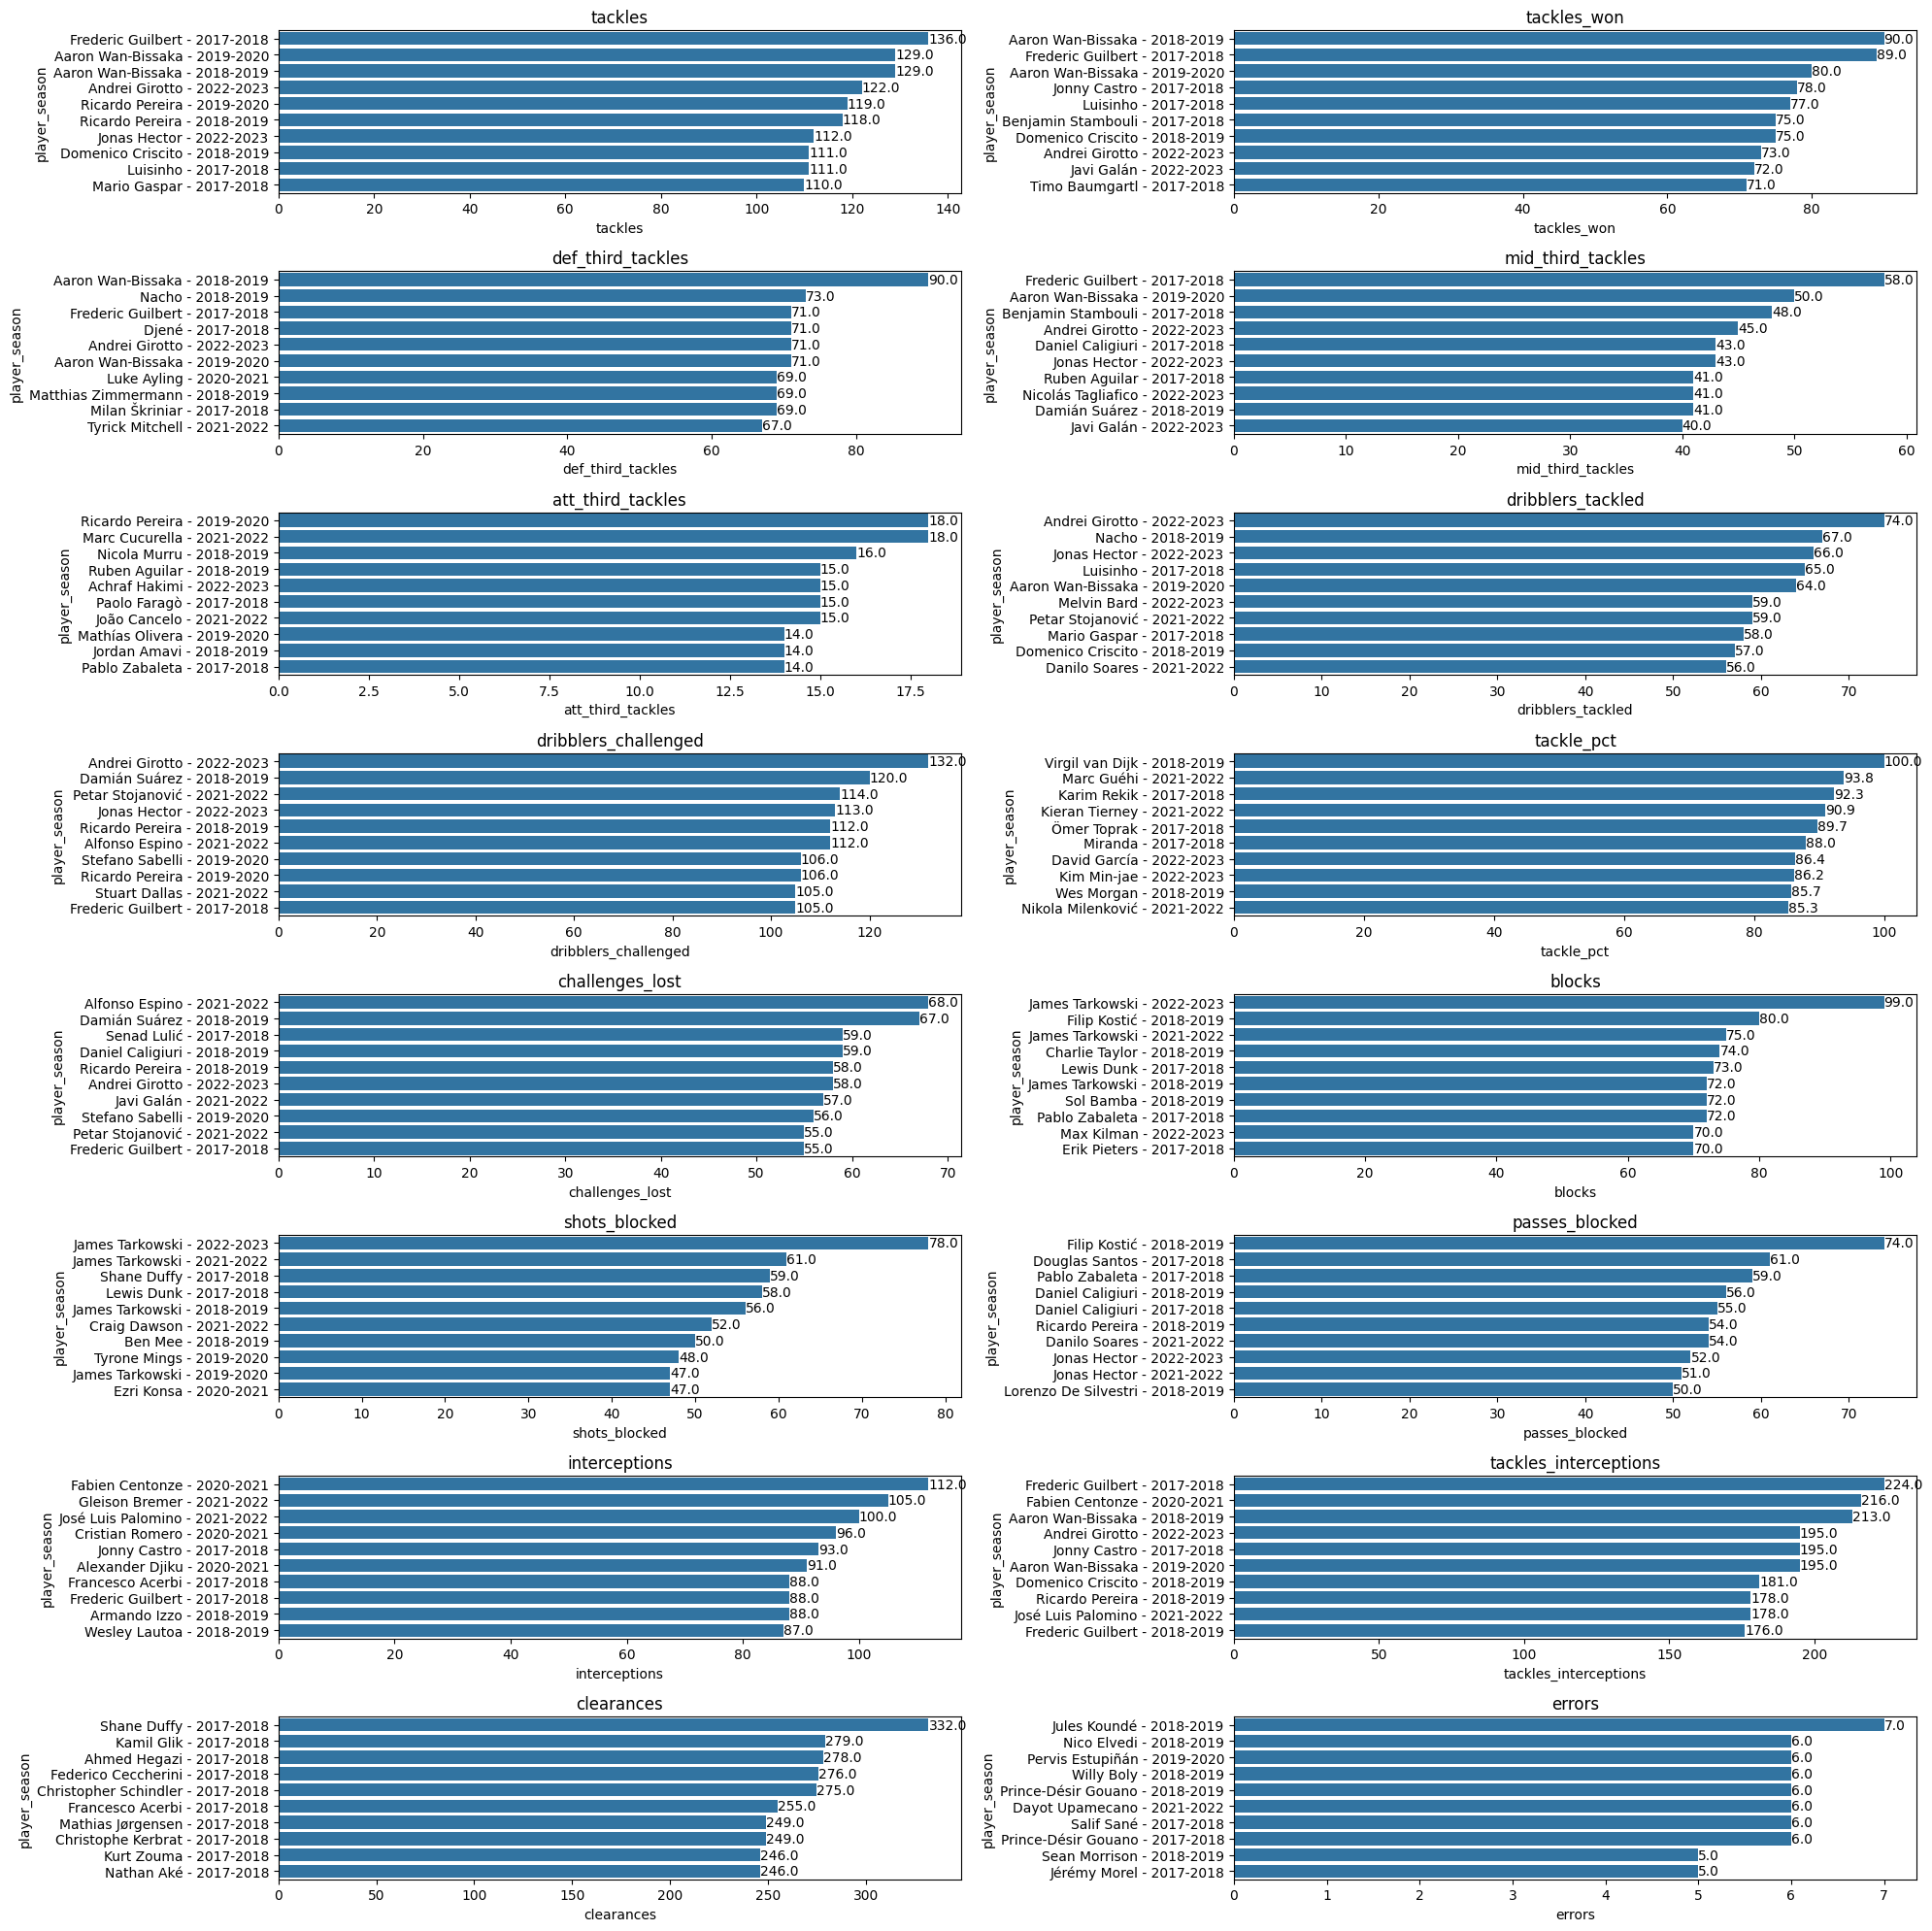

In [64]:
plot_top_10_per_position(df_20_90s_played, cols=cols)

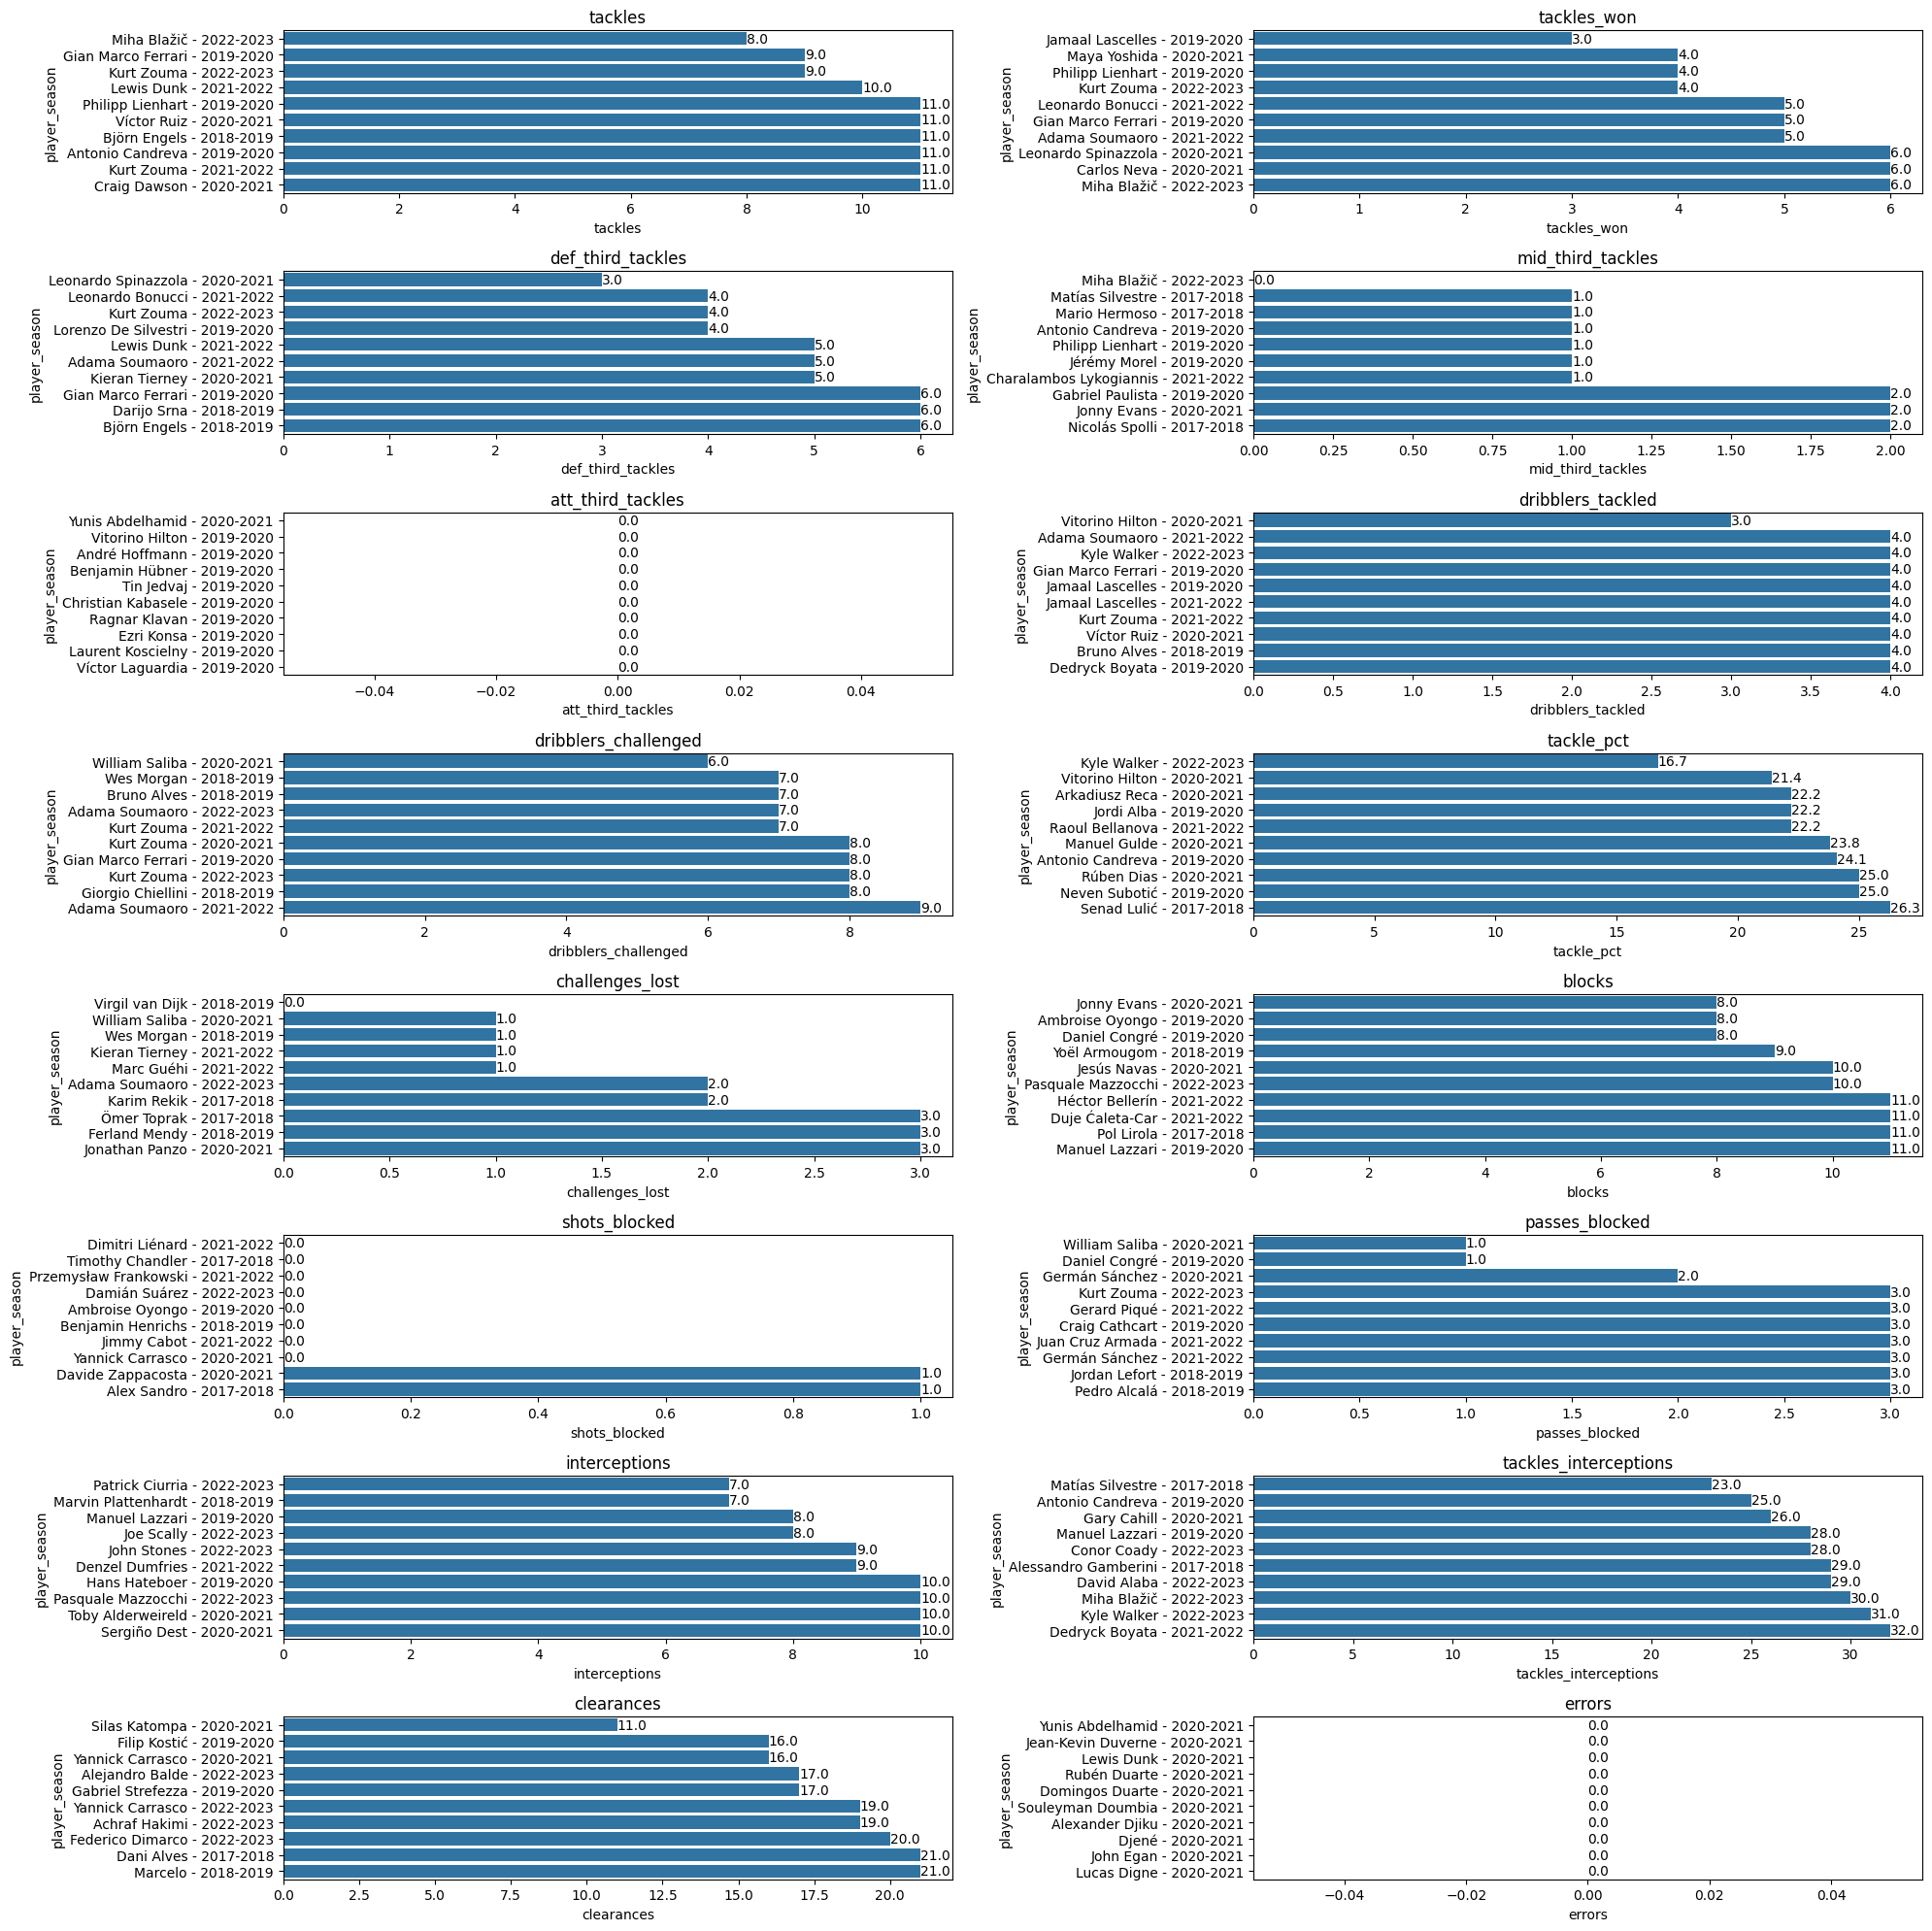

In [65]:
plot_top_10_per_position(df_20_90s_played, cols=cols, ascending=True)

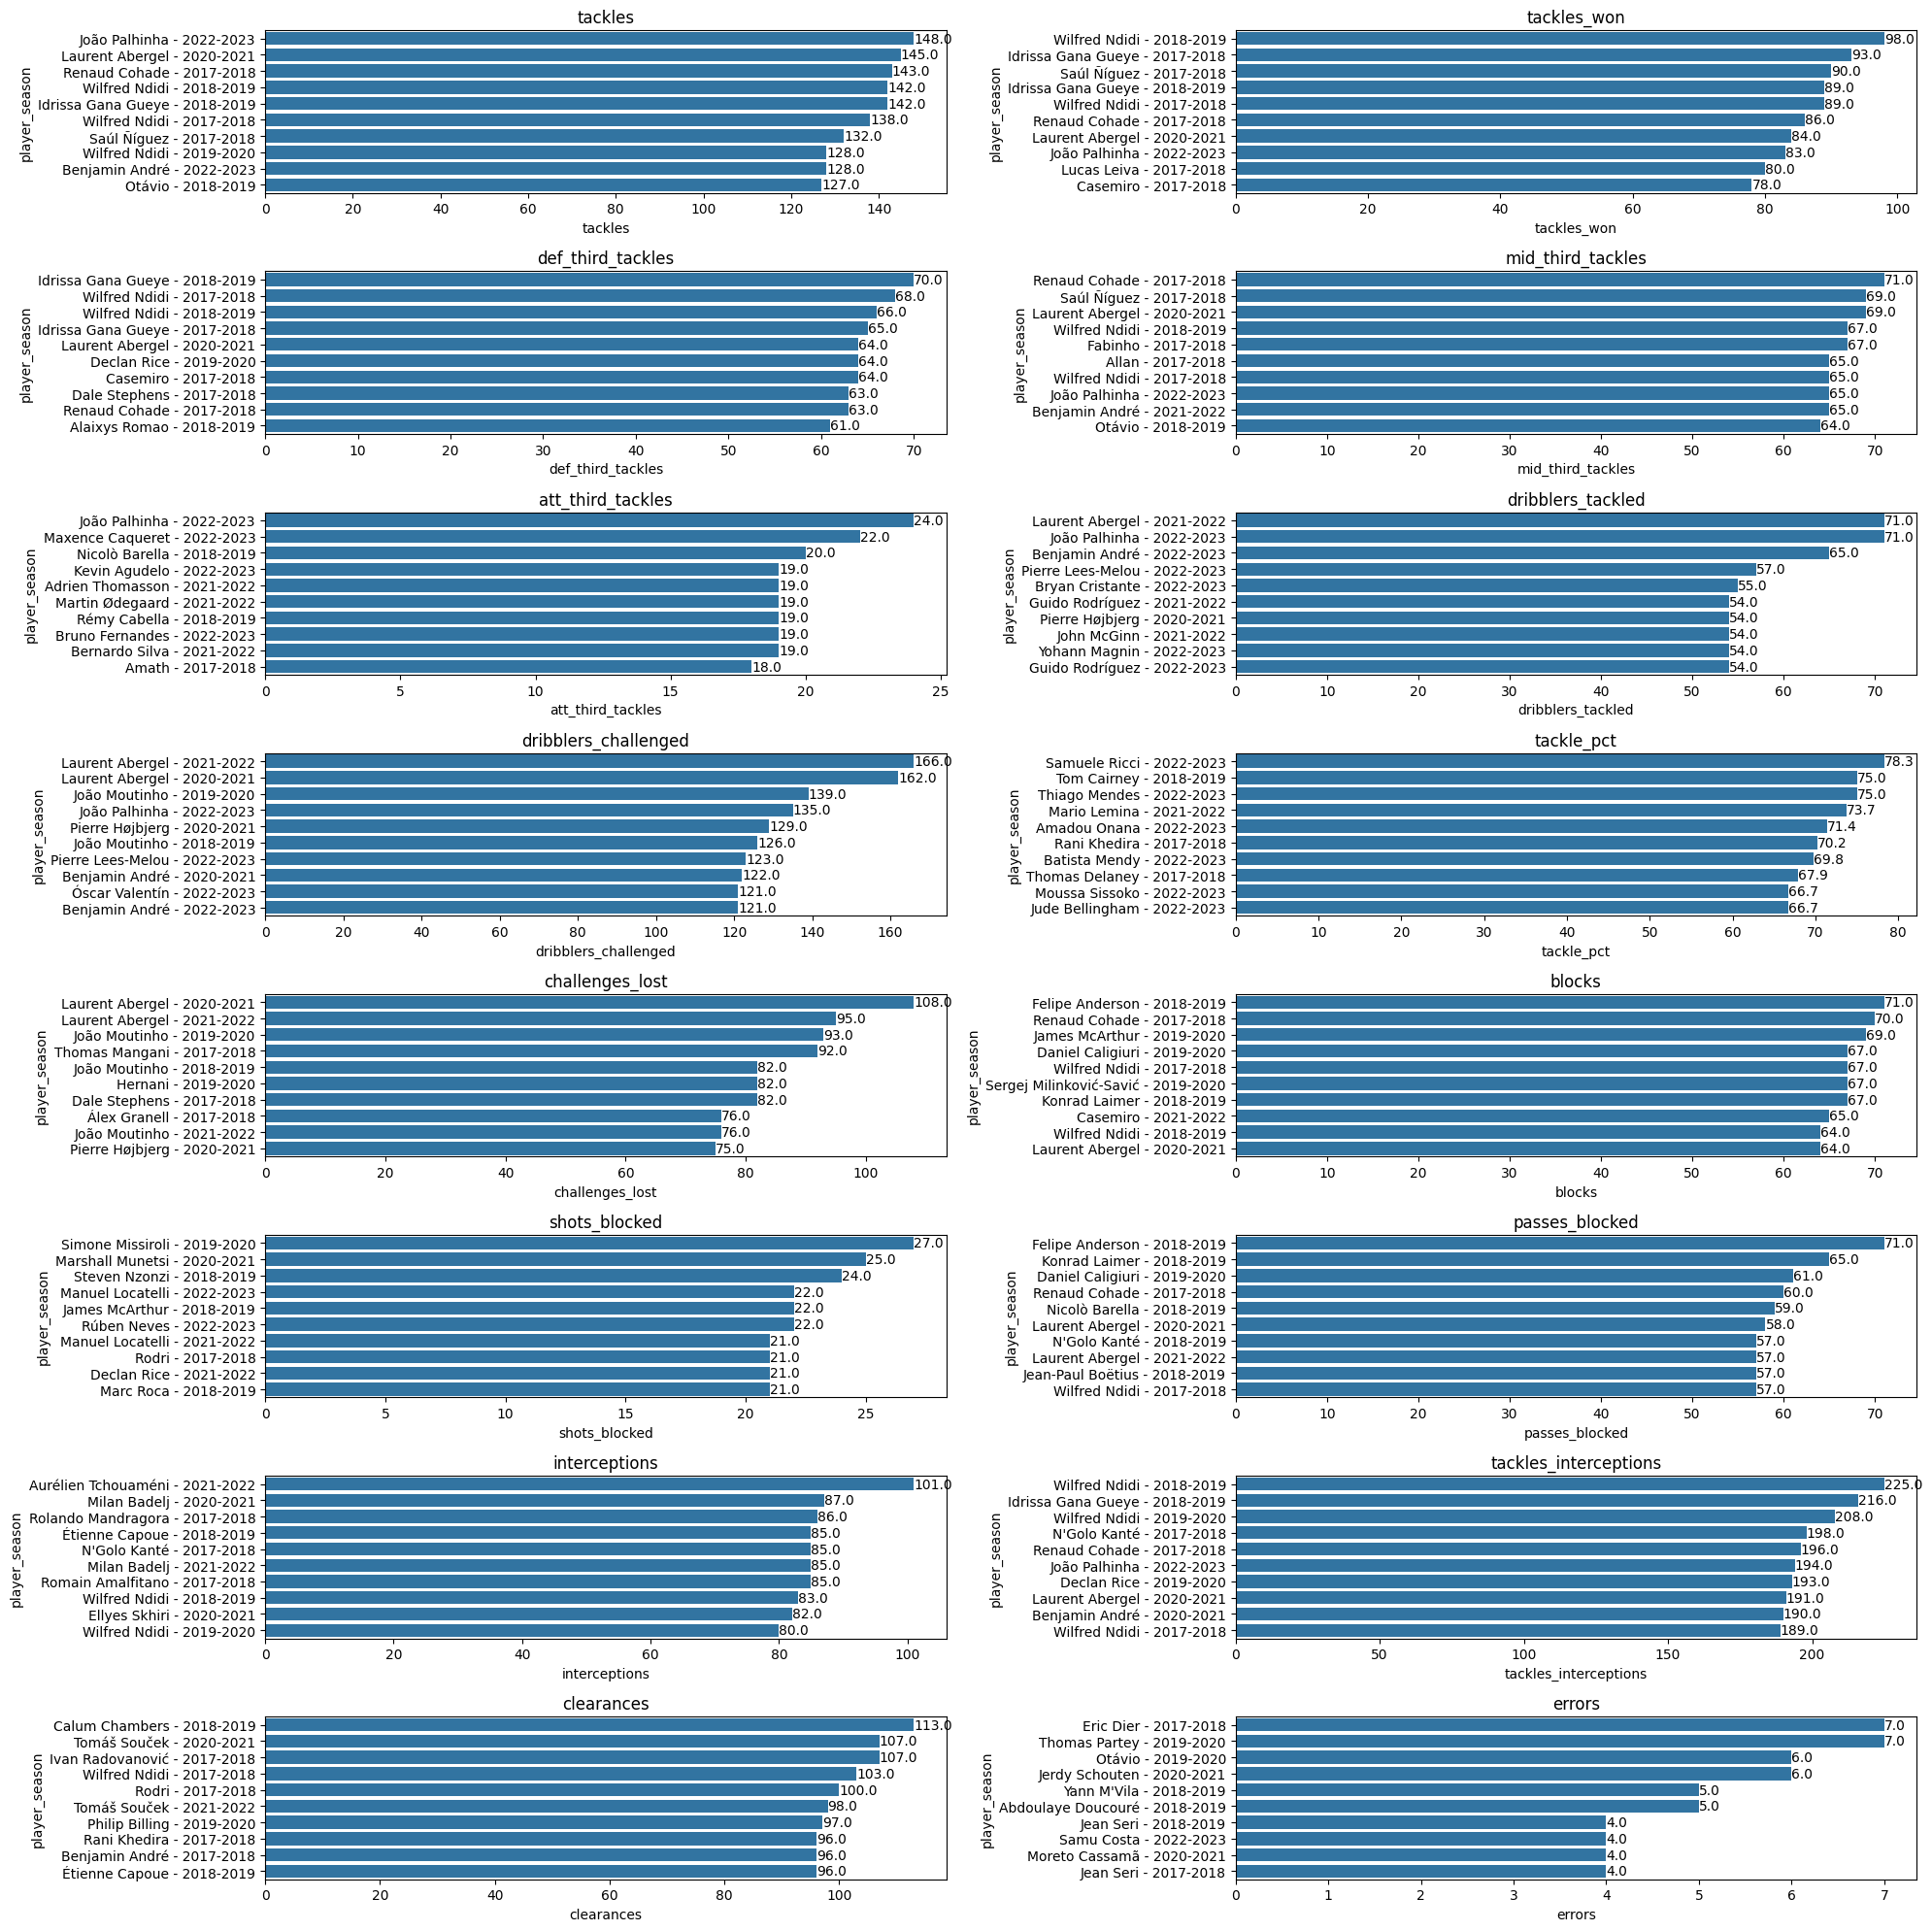

In [66]:
plot_top_10_per_position(df_20_90s_played, cols=cols, ascending=False, position='Midfielder')

In [74]:
stat_plots_2 = StatisticPlots(df_20_90s_played)

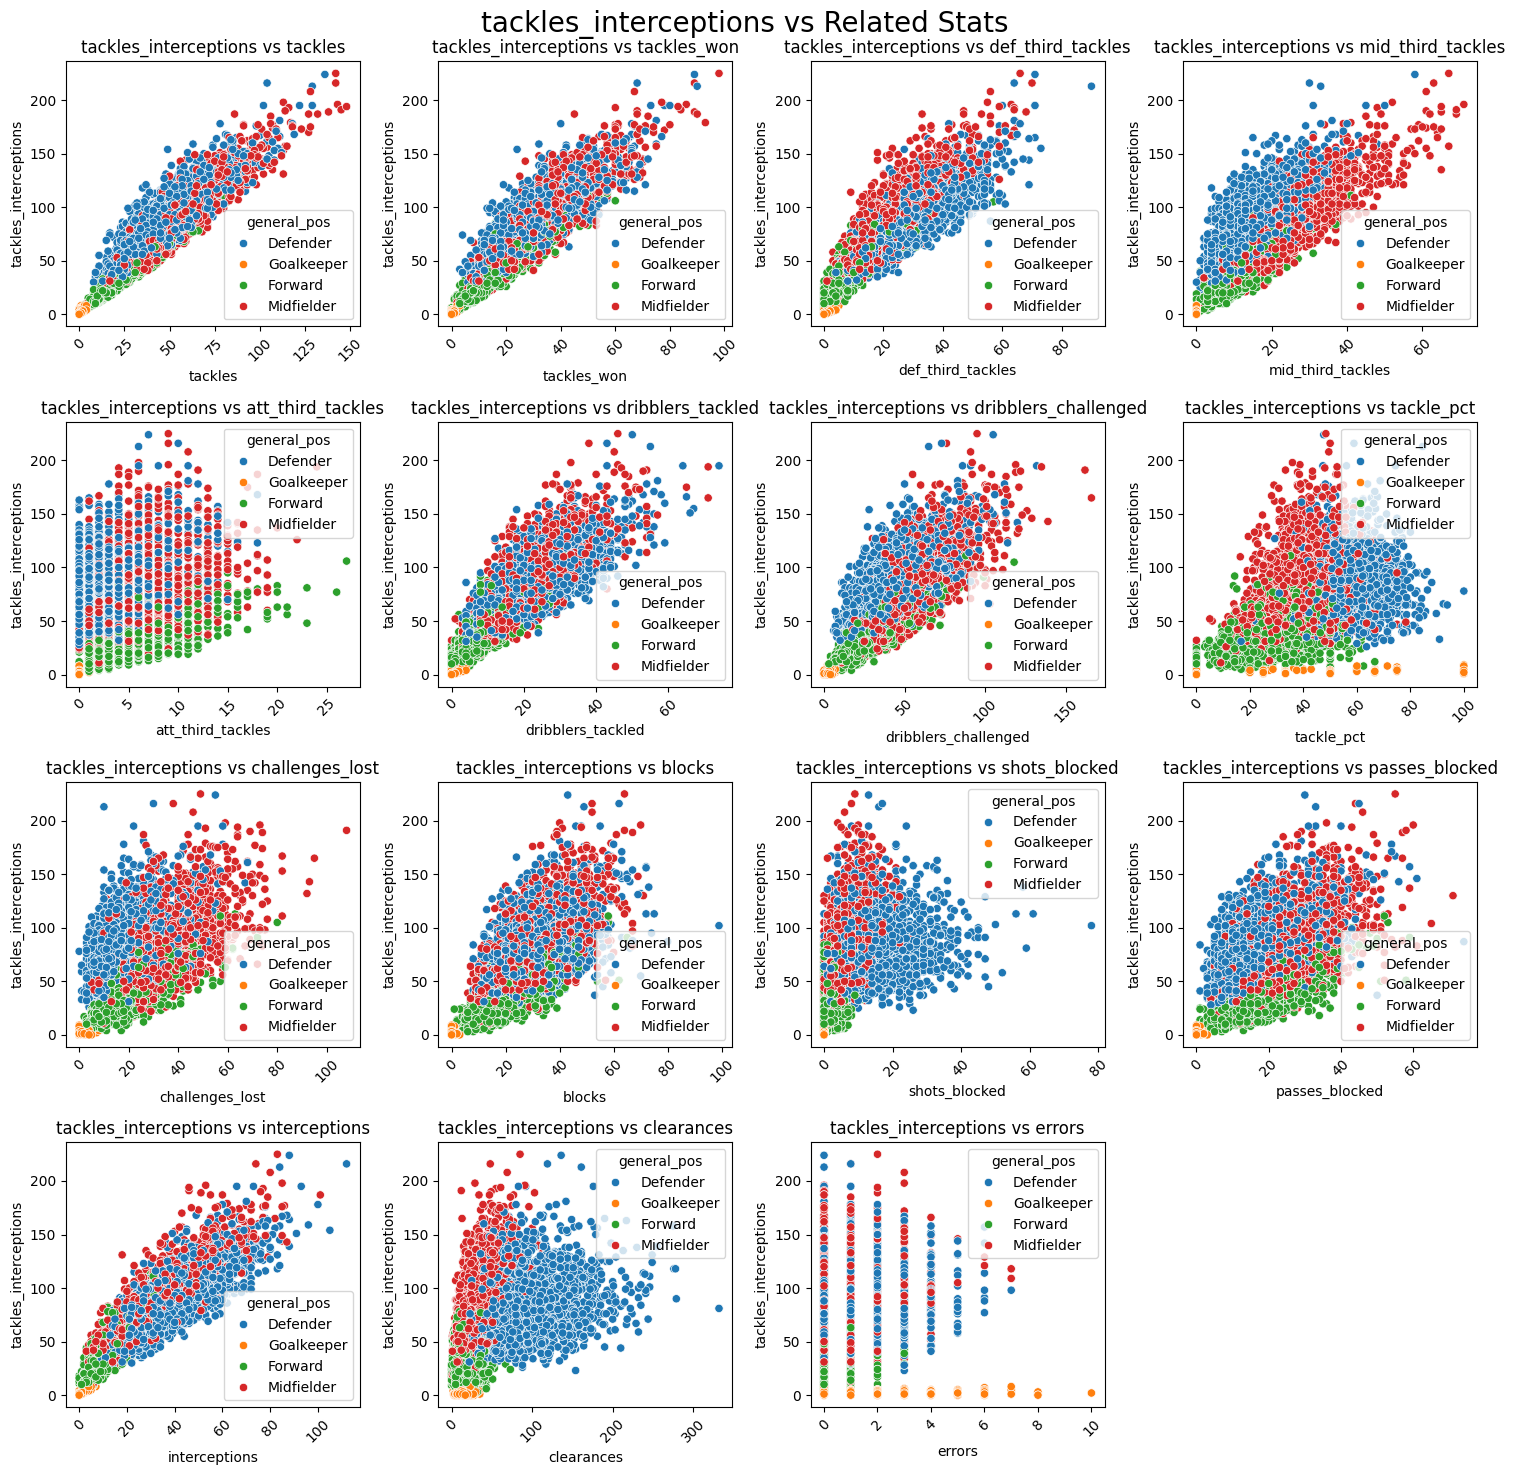

In [76]:
stat_plots_2.relationships(y='tackles_interceptions', X=cols, hue='general_pos')

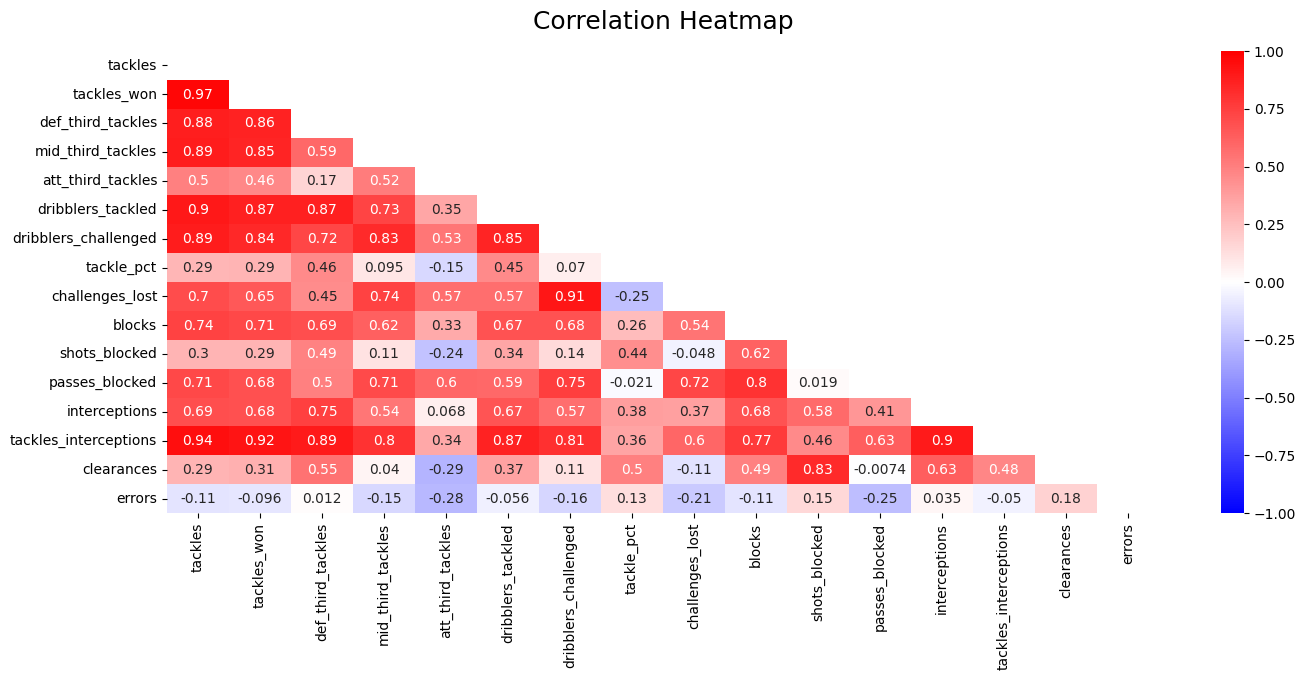

In [77]:
stat_plots_2.correlation_matrix(cols)

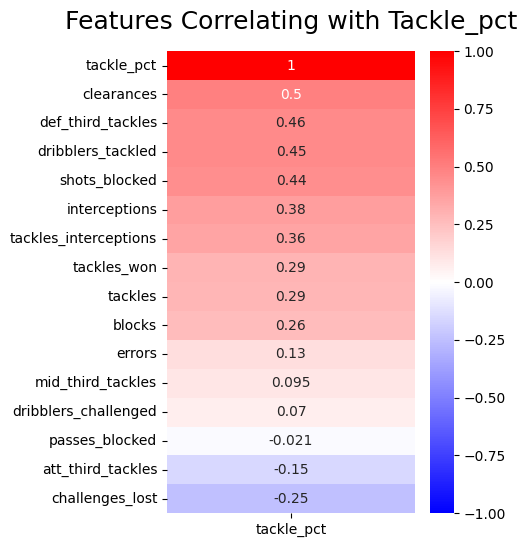

In [79]:
stat_plots_2.dependent_correlations(y_var='tackle_pct', vars=cols)